# GONZAG cloud example

In [1]:
import sys
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
from gonzag.config import *
from gonzag.io import *
from gonzag.utils import *
from gonzag.mod2sat import *
from gonzag.bilin_mapping import *
from gonzag.spectralysis import *


## Data

In [3]:
import xarray as xr
osn_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60_surface_region_1'
dsmod = xr.open_zarr(osn_url, consolidated=True)

In [4]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [5]:
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
l_griddist = False

In [6]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat["al"].to_dask()

In [7]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185024 ... 2...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    creator_name:              CMEMS - Sea Level Thematic Assembly Center
    creator_url:               http://marine.copernicus.eu
    history:                   2019-02-20T19:39:52Z: Creation
    institution:               CLS, CNES
    keywords:                  Oceans > Ocean Topography > Sea Surface Height
    keywords_vocabulary:       NetCDF COARDS Climate and Forecast Standard Names
    license:                   http://marine.copernicus.eu/web/27-service-com...
    platform:                  Altika
    processing_level:          L3
    product_version:           2019
    project:                   COPERNICUS MARINE ENVIRONMENT MONITORING SERVI...
    references:                http://marine.copernicus.eu
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [8]:
name_ssh_sat='sla_unfiltered'

## Time overlap between model and satellite ?
Assume that model is less than 1 year, satellite has at least one whole year, we take the overlapping period without considering which year is this

In [9]:
    (date1,date2), (Nts,Ntm) = GetTimeOverlap( dssat , dsmod )
    print(' *** Time overlap between model and satellite in UNIX epoch time: it1, it2',date1,'--',date2)


 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time"
   => first and last date:  2013-03-14T05:44:50.445185024 -- 2015-03-31T22:41:36.909480960
 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time_counter"
   => first and last date:  2010-02-01T00:30:00.000000000 -- 2010-04-30T23:30:00.000000000

 *** Earliest/latest dates:
   => for satellite data: 2013-03-14T05:44:50.445185024 2015-03-31T22:41:36.909480960 
   => for model     data: 2010-02-01T00:30:00.000000000 2010-04-30T23:30:00.000000000 

 *** Time overlap between model and satellite in UNIX epoch time: it1, it2 2014-02-01 -- 2014-04-30


## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [10]:
  
    ModelGrid = ModGrid( dsmod, date1 , date2 , dsmod, name_lsm_mod, distorded_grid=False )


 *** [GetModelCoor()] Read model latitude (variable is "lat", with 2 dimensions! (763, 611) 

 *** [GetModelCoor()] Read model longitude (variable is "lon", with 2 dimensions! (763, 611) 


 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** [GridResolution()] Based on the longitude array, the model resolution ~=  0.016657295  degrees 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.99 292.17
     * lat_min, lat_max =  30.01 40.01
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2136
       =

In [11]:
SatelliteTrack = SatTrack( dssat, date1, date2, Np=Nts, \
                              domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...
 *** [GetSatCoor()] reading "latitude" in dataset ...
   => 4150072 records read...

 *** [GetSatCoor()] reading "longitude" in dataset ...
   => 4150072 records read...


 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10236
       ==> time record indices: 14883510 to 19033581, included



In [12]:
MG= ModelGrid
ST= SatelliteTrack

In [13]:
ST.time

<xarray.DataArray 'time' (time: 10236)>
array(['2014-02-02T23:14:13.207443968', '2014-02-02T23:14:14.187443968',
       '2014-02-02T23:14:15.167443968', ..., '2014-04-29T23:14:02.891097088',
       '2014-04-29T23:14:03.871097088', '2014-04-29T23:14:04.851097088'],
      dtype='datetime64[ns]')
Coordinates:
    latitude   (time) float64 dask.array<chunksize=(10236,), meta=np.ndarray>
    longitude  (time) float64 dask.array<chunksize=(10236,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2014-02-02T23:14:13.207443968 ... 2014-0...
Attributes:
    axis:           T
    long_name:      Time of measurement
    standard_name:  time

In [14]:
MG.time

<xarray.DataArray 'time_counter' (time_counter: 2136)>
array(['2010-02-01T00:30:00.000000000', '2010-02-01T01:30:00.000000000',
       '2010-02-01T02:30:00.000000000', ..., '2010-04-30T21:30:00.000000000',
       '2010-04-30T22:30:00.000000000', '2010-04-30T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Attributes:
    axis:           T
    bounds:         time_counter_bounds
    long_name:      Time axis
    standard_name:  time
    time_origin:    1900-01-01 00:00:00

In [17]:
ST.lat.shape

(10236,)

In [24]:
np.min(MG.lat.values)

30.010681

In [19]:
import xarray as xr
import numpy as np
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 
import matplotlib
matplotlib.rcParams.update({'font.size': 22})


In [25]:
latminM=np.min(MG.lat.values)
latmaxM=np.max(MG.lat.values)
lonminM=np.min(MG.lon.values)
lonmaxM=np.max(MG.lon.values)

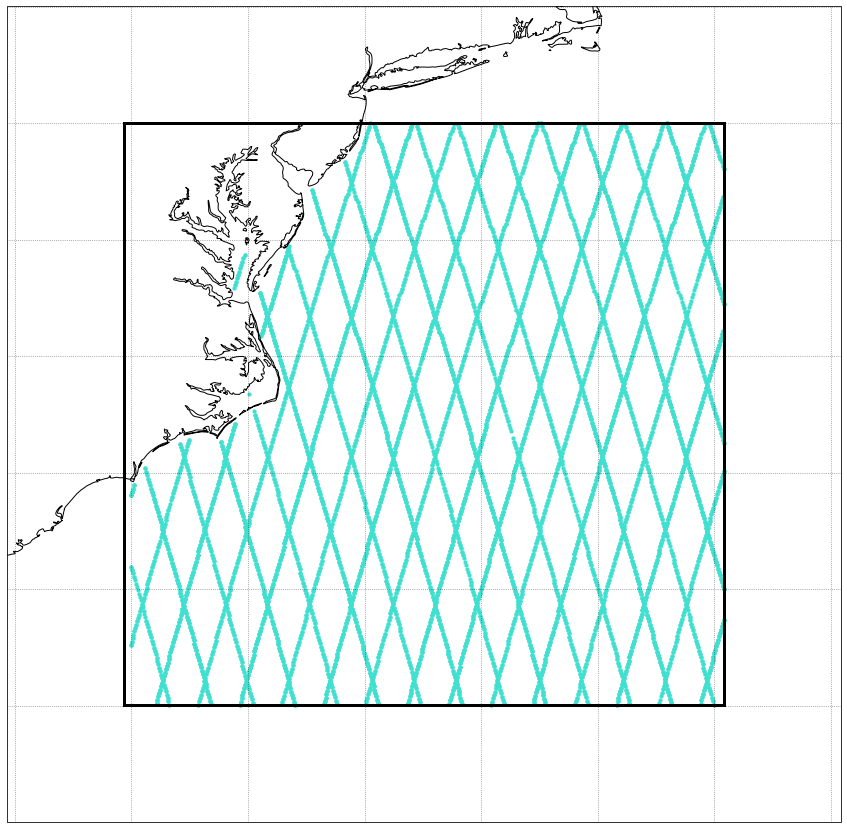

In [27]:
fig=plt.figure(figsize=(20,15))
ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

plt.scatter(ST.lon,ST.lat, c='turquoise',
            label='altika tracks', linewidth=0, s=18,
            transform=ccrs.PlateCarree(),zorder=1);
plt.savefig('alitka_tracks.png')

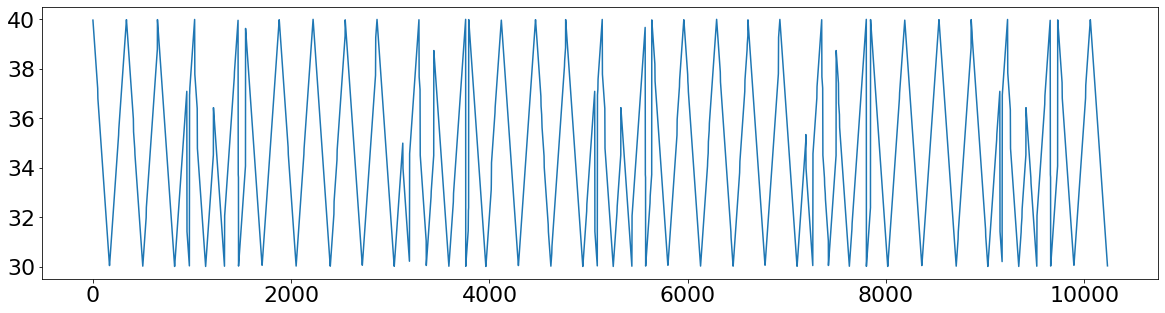

In [29]:
fig=plt.figure(figsize=(20,5))
plt.plot(ST.lat)

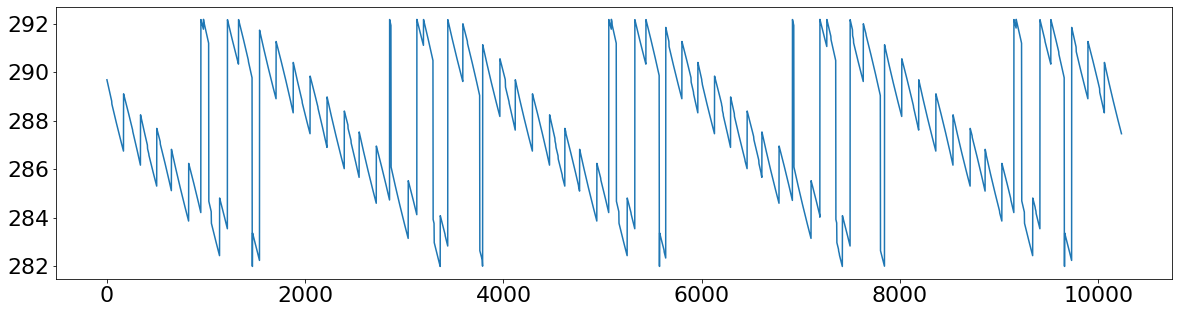

In [30]:
fig=plt.figure(figsize=(20,5))
plt.plot(ST.lon)

In [34]:
lat1=ST.lat.values

In [35]:
lat1

array([39.973308, 39.915793, 39.858275, ..., 30.154056, 30.096212,
       30.038367])

In [39]:
lat2=np.roll(lat1,-1)

In [40]:
lat2

array([39.915793, 39.858275, 39.800753, ..., 30.096212, 30.038367,
       39.973308])

In [41]:
deriv_lat=lat2-lat1

In [44]:
np.sign(deriv_lat)

array([-1., -1., -1., ..., -1., -1.,  1.])

In [48]:
it1=0
it2=np.min(np.where(np.sign(deriv_lat)==-1*np.sign(deriv_lat[it1])))

In [49]:
it2

167

In [51]:
deriv_lat[it1:it2]

array([-0.057515, -0.057518, -0.057522, -0.057522, -0.057526, -0.057528,
       -0.057531, -0.057533, -0.057535, -0.057537, -0.057541, -0.057542,
       -0.057545, -0.057548, -0.057549, -0.057552, -0.057555, -0.057556,
       -0.057559, -0.057561, -0.057564, -0.057567, -0.057568, -0.05757 ,
       -0.057574, -0.057575, -0.057577, -0.05758 , -0.057582, -0.057584,
       -0.057587, -0.057589, -0.057592, -0.057593, -0.057595, -0.057598,
       -0.057601, -0.057602, -0.057605, -0.057606, -0.057609, -0.057611,
       -0.057613, -0.057616, -0.057617, -0.05762 , -0.057622, -0.057625,
       -0.34579 , -0.057639, -0.057641, -0.057643, -0.057646, -0.057648,
       -0.057649, -0.057651, -0.057654, -0.057657, -0.057658, -0.057659,
       -0.057662, -0.057665, -0.057666, -0.057667, -0.057671, -0.057673,
       -0.057673, -0.057677, -0.057678, -0.05768 , -0.057682, -0.057685,
       -0.057685, -0.057689, -0.05769 , -0.057693, -0.057693, -0.057696,
       -0.057698, -0.0577  , -0.057702, -0.057703, 

In [53]:
deriv_lat[it2:it2+10]

array([0.018647, 0.057856, 0.057855, 0.057853, 0.057851, 0.05785 ,
       0.057849, 0.057846, 0.057846, 0.057844])

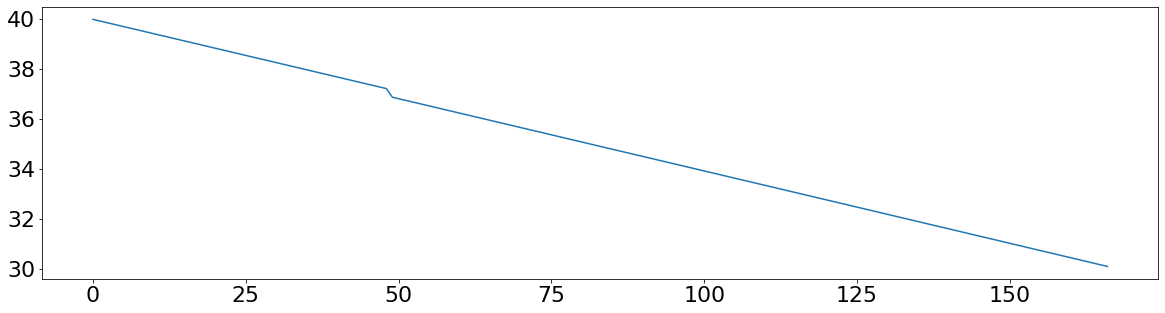

In [54]:
fig=plt.figure(figsize=(20,5))
plt.plot(ST.lat[it1:it2])

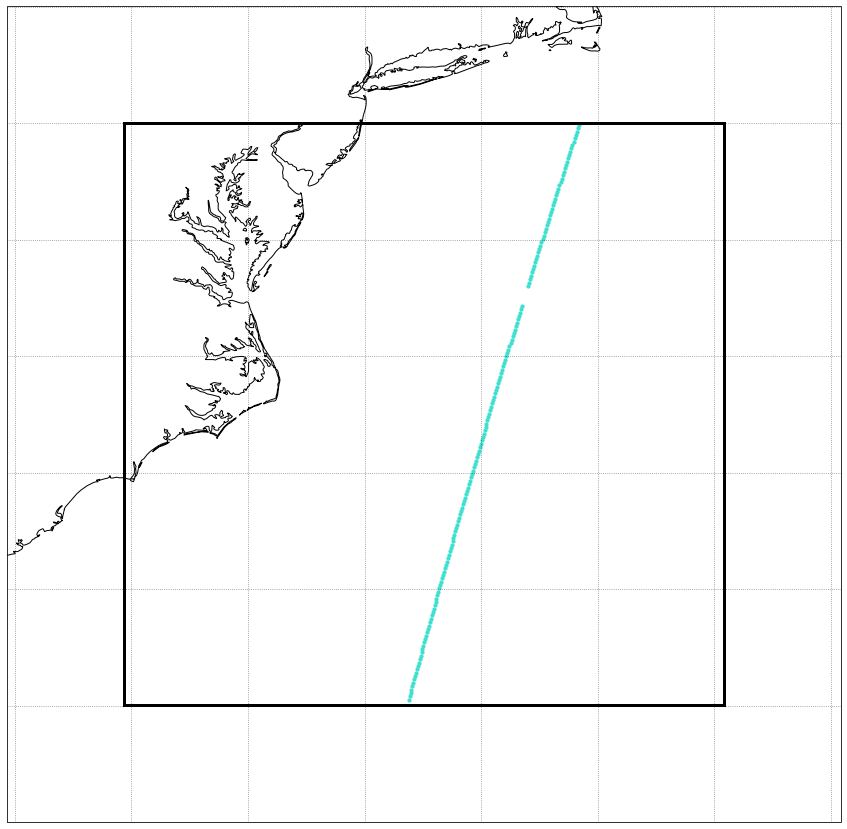

In [55]:
fig=plt.figure(figsize=(20,15))
ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

plt.scatter(ST.lon[it1:it2],ST.lat[it1:it2], c='turquoise',
            label='altika tracks', linewidth=0, s=18,
            transform=ccrs.PlateCarree(),zorder=1);
plt.savefig('alitka_tracks.png')

In [56]:
len(ST.lat)

10236

In [67]:
it1=0
it2=0
index_tracks=[]
lat1=ST.lat.values
lat2=np.roll(lat1,-1)
deriv_lat=lat2-lat1

while it2 < len(ST.lat):
    it2=np.min(np.where(np.sign(deriv_lat)==-1*np.sign(deriv_lat[it1])))
    index_tracks.append([it1,it2])
    it1=it2
    
    
    

KeyboardInterrupt: 

In [69]:
del index_tracks

In [79]:
it1=0
it2=0
index_tracks=[]
lat1=ST.lat.values
lat2=np.roll(lat1,-1)
deriv_lat=lat2-lat1
it2=np.min(np.where(np.sign(deriv_lat)==-1*np.sign(deriv_lat[it1])))
index_tracks.append([it1,it2])



In [80]:
it2

167

In [81]:
index_tracks

[[0, 167]]

In [82]:
it1=it2
it2=np.min(np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1])))


In [83]:
it1

167

In [84]:
it2

171

In [88]:
it1=0
it2=0
index_tracks=[]
lat1=ST.lat.values
lat2=np.roll(lat1,-1)
deriv_lat=lat2-lat1

it1=it1+it2
print(it1)
it2=np.min(np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1])))
index_tracks.append([it1,it1+it2])
    
    
    
    

0


In [89]:
it1=it1+it2
print(it1)
it2=np.min(np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1])))
index_tracks.append([it1,it1+it2])


167


In [90]:
it1=it1+it2
print(it1)
it2=np.min(np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1])))
index_tracks.append([it1,it1+it2])


338


In [91]:
it1=it1+it2
print(it1)
it2=np.min(np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1])))
index_tracks.append([it1,it1+it2])


503


In [109]:
it1=0
it2=0
index_tracks=[]
lat1=ST.lat.values
lat2=np.roll(lat1,-1)
deriv_lat=lat2-lat1
while it2 < len(ST.lat):
    it1=it2
    print(it1)
    ind=np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1]))
    if len(ind[0])>0:
        it=np.min(ind)
        it2=it1+it
        index_tracks.append([it1,it2])
    else:
        break


0
167
338
503
651
824
947
973
1026
1137
1216
1327
1464
1469
1540
1706
1879
2050
2221
2394
2545
2717
2866
3039
3126
3193
3289
3363
3439
3591
3760
3761
3791
3964
4120
4292
4465
4620
4769
4942
5062
5088
5138
5249
5326
5437
5571
5576
5638
5800
5961
6130
6292
6458
6608
6780
6930
7103
7192
7262
7352
7420
7498
7631
7802
7803
7845
8018
8190
8362
8535
8709
8860
9028
9149
9172
9227
9340
9413
9522
9657
9662
9733
9896
10062
10235


In [93]:
it1

10235

In [95]:
it1+it2

10408

In [96]:
deriv_lat[it1:]

array([9.934941])

In [97]:
np.sign(deriv_lat[it1])

1.0

In [101]:
truc=np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1]))

In [100]:
len(np.where(np.sign(deriv_lat[it1:])==-1*np.sign(deriv_lat[it1])))

1

In [105]:
sys.getsizeof(truc)

48

In [108]:
len(truc[0])

0

In [110]:
index_tracks

[[0, 167],
 [167, 338],
 [338, 503],
 [503, 651],
 [651, 824],
 [824, 947],
 [947, 973],
 [973, 1026],
 [1026, 1137],
 [1137, 1216],
 [1216, 1327],
 [1327, 1464],
 [1464, 1469],
 [1469, 1540],
 [1540, 1706],
 [1706, 1879],
 [1879, 2050],
 [2050, 2221],
 [2221, 2394],
 [2394, 2545],
 [2545, 2717],
 [2717, 2866],
 [2866, 3039],
 [3039, 3126],
 [3126, 3193],
 [3193, 3289],
 [3289, 3363],
 [3363, 3439],
 [3439, 3591],
 [3591, 3760],
 [3760, 3761],
 [3761, 3791],
 [3791, 3964],
 [3964, 4120],
 [4120, 4292],
 [4292, 4465],
 [4465, 4620],
 [4620, 4769],
 [4769, 4942],
 [4942, 5062],
 [5062, 5088],
 [5088, 5138],
 [5138, 5249],
 [5249, 5326],
 [5326, 5437],
 [5437, 5571],
 [5571, 5576],
 [5576, 5638],
 [5638, 5800],
 [5800, 5961],
 [5961, 6130],
 [6130, 6292],
 [6292, 6458],
 [6458, 6608],
 [6608, 6780],
 [6780, 6930],
 [6930, 7103],
 [7103, 7192],
 [7192, 7262],
 [7262, 7352],
 [7352, 7420],
 [7420, 7498],
 [7498, 7631],
 [7631, 7802],
 [7802, 7803],
 [7803, 7845],
 [7845, 8018],
 [8018, 8190

In [130]:
len_tracks=[]
for k in np.arange(len(index_tracks)):
    len_tracks.append(index_tracks[k][1]-index_tracks[k][0])

In [135]:
for k in np.arange(len(index_tracks)):
    len_track = index_tracks[k][1]-index_tracks[k][0]
    if len_track == 1:
        del index_tracks[k]

In [136]:
len(index_tracks)

83

In [133]:
np.sum(len_tracks)

10235

In [111]:
len(ST.lat)

10236

In [112]:
len(index_tracks)

85

In [124]:
index_tracks[10][1]

1327

In [115]:
ST.lon[index_tracks[10]].values

array([292.159995, 290.327791])

In [119]:
k=0

In [120]:
ST.lon[index_tracks[k]].values

array([289.681787, 286.74256 ])

In [121]:
ST.lat[index_tracks[k]].values

array([39.973308, 30.049566])

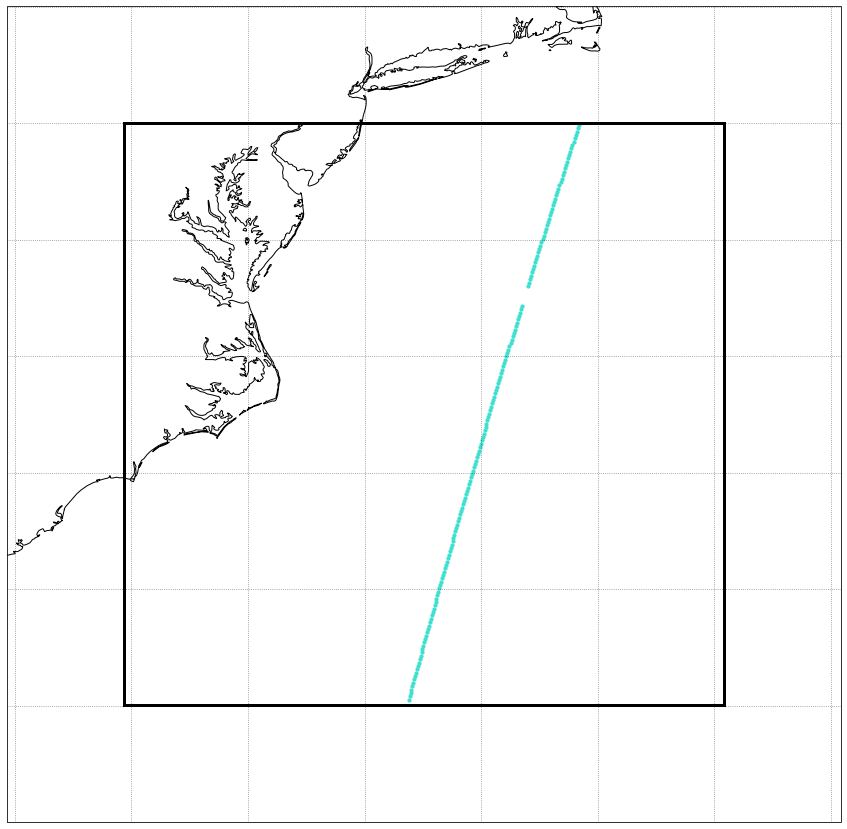

In [127]:
    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                              alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

    plt.scatter(ST.lon[index_tracks[k][0]:index_tracks[k][1]],ST.lat[index_tracks[k][0]:index_tracks[k][1]], c='turquoise',
                label='altika tracks', linewidth=0, s=18,
                transform=ccrs.PlateCarree(),zorder=1);
    plt.savefig('plots-tracks/altika_tracks_'+str(k)+'.png')

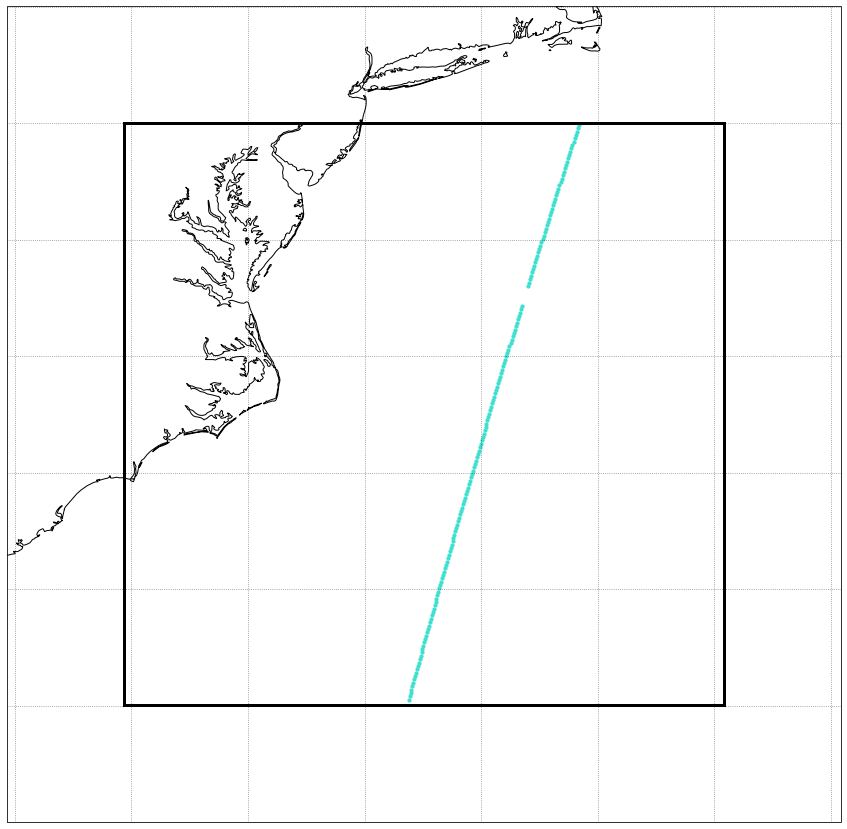

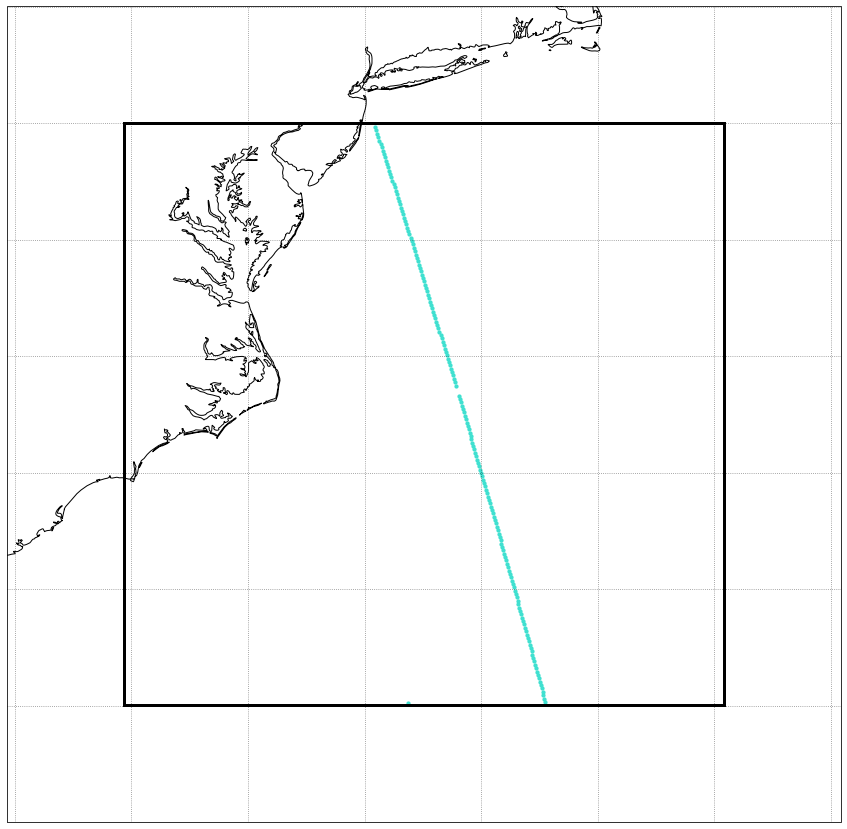

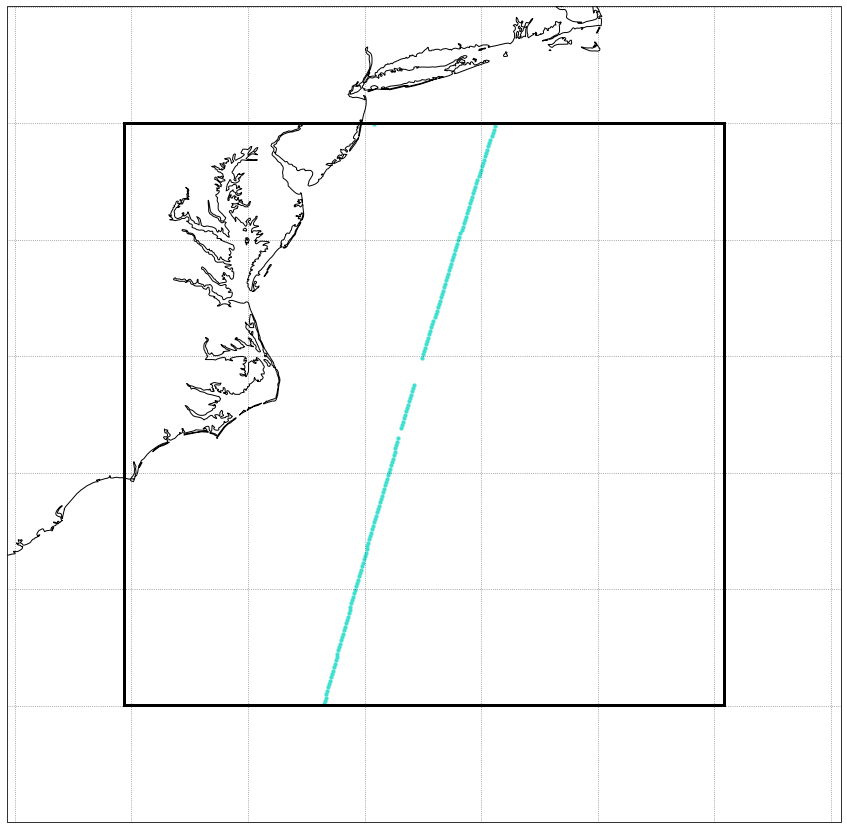

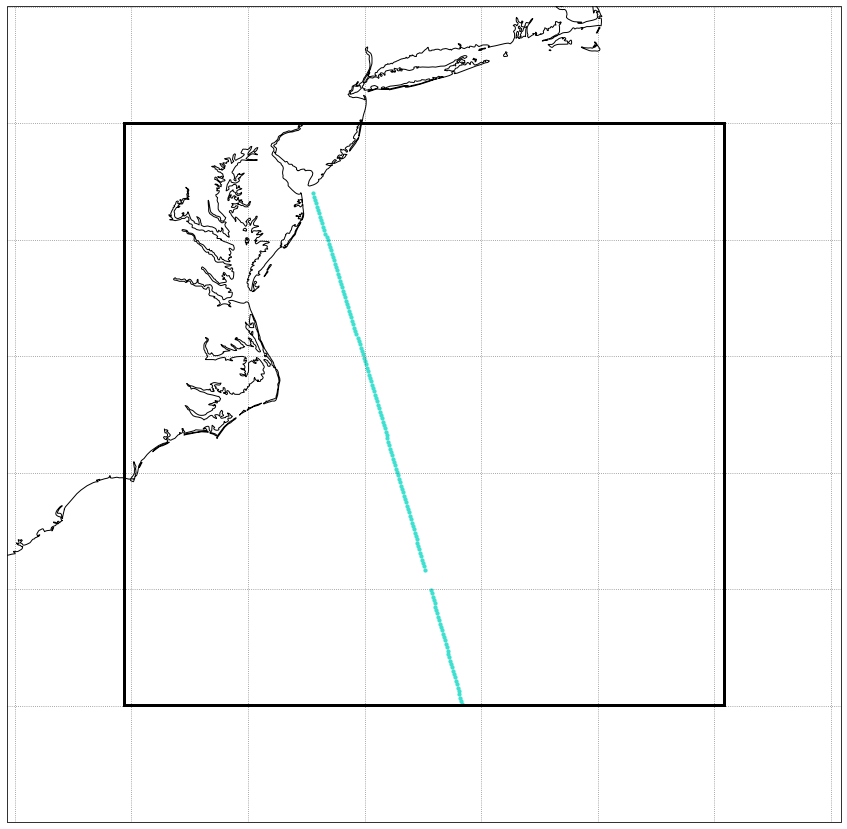

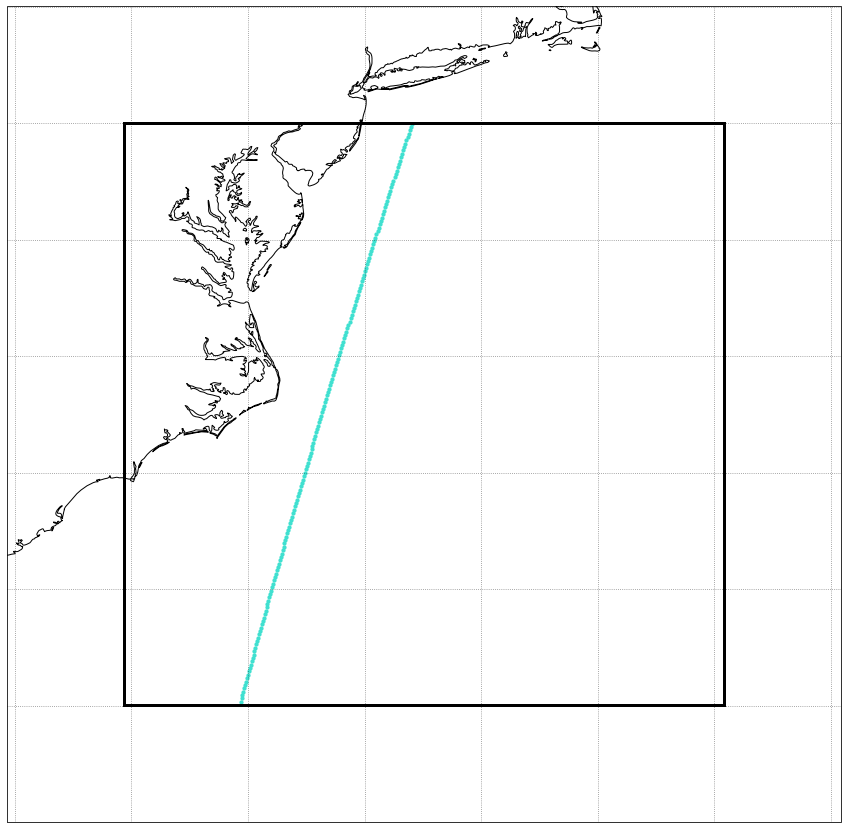

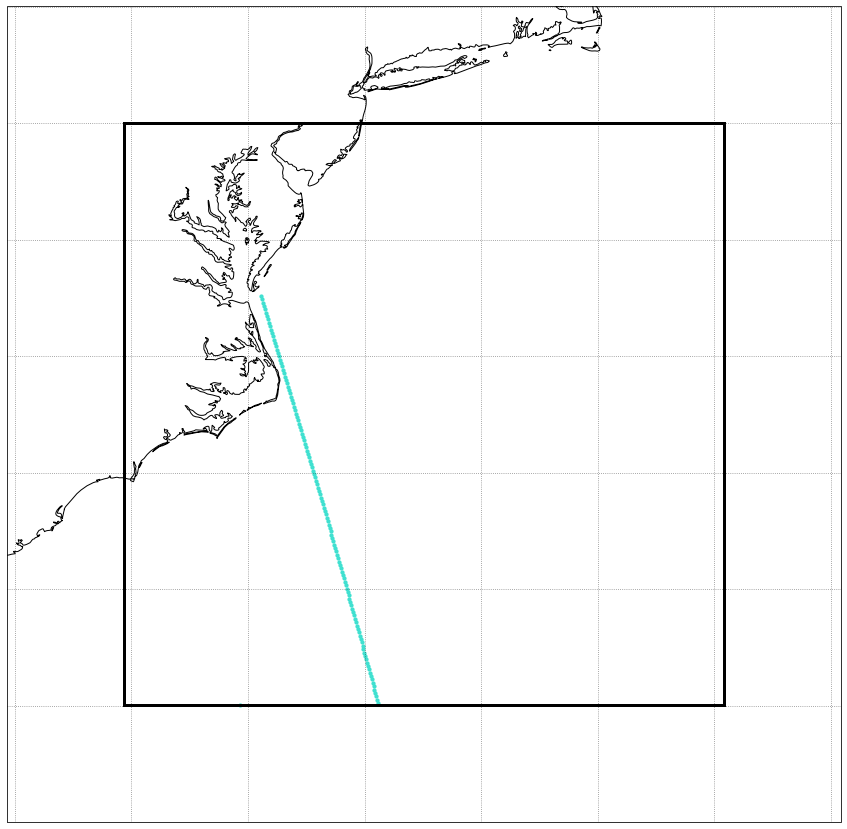

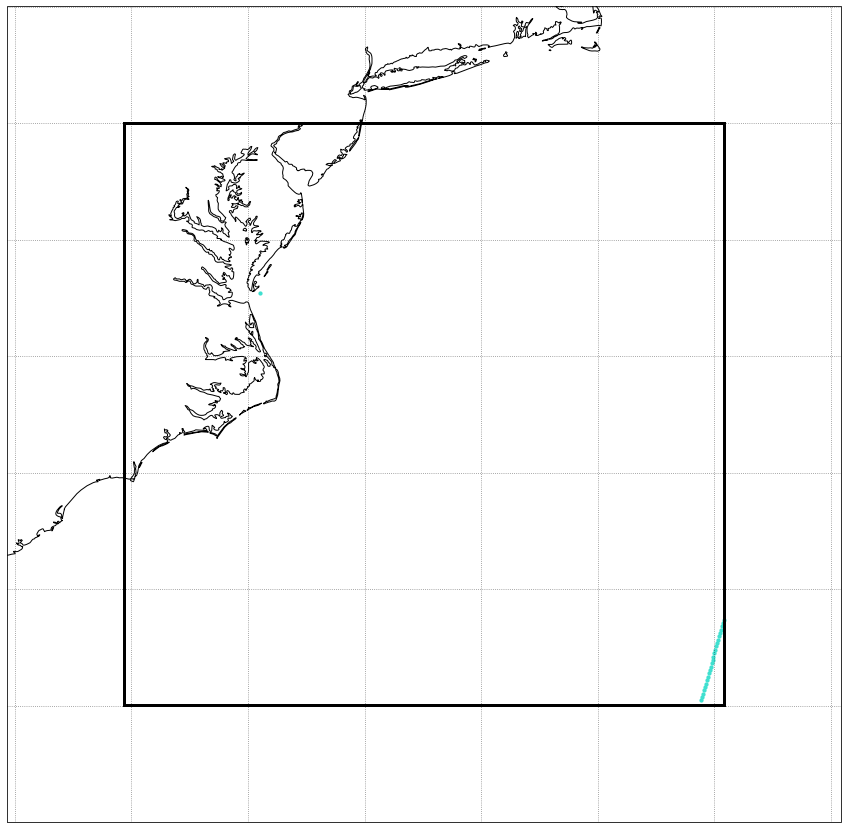

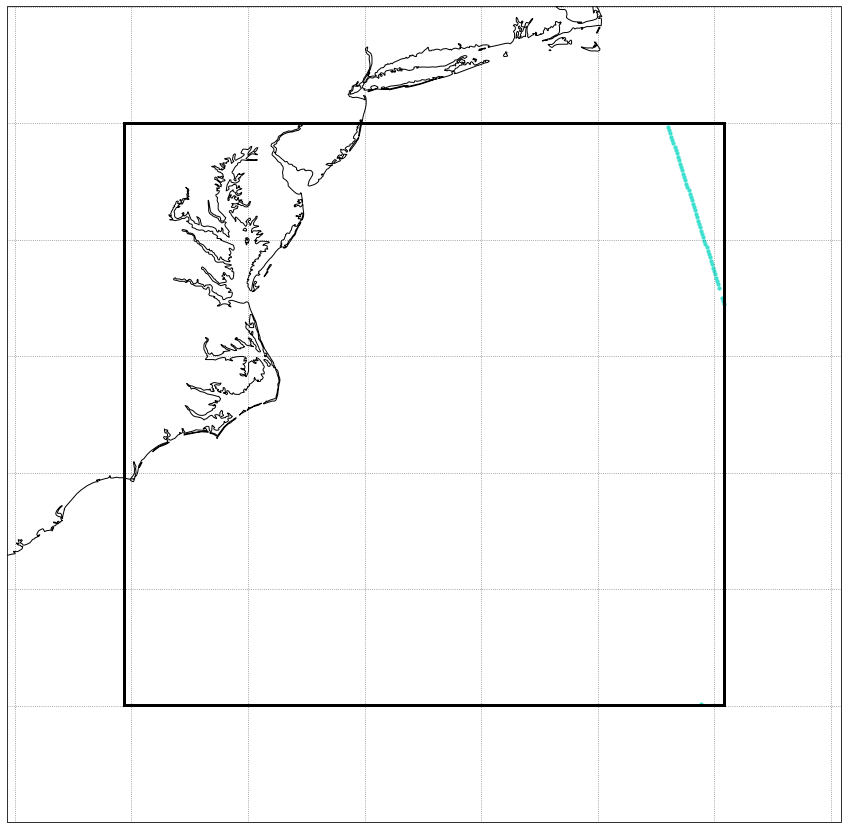

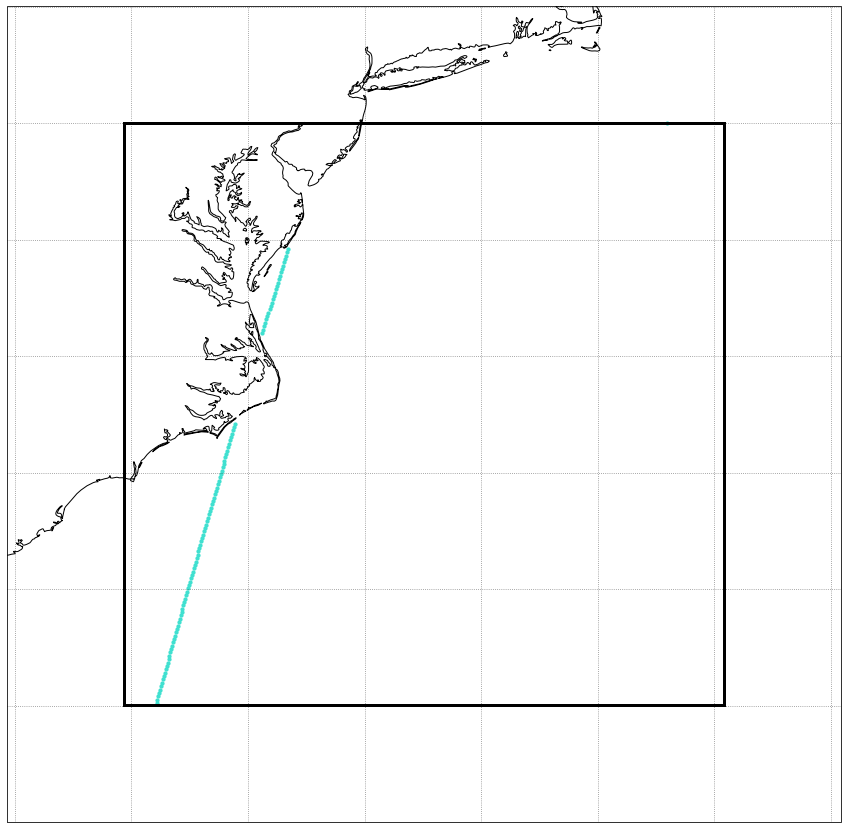

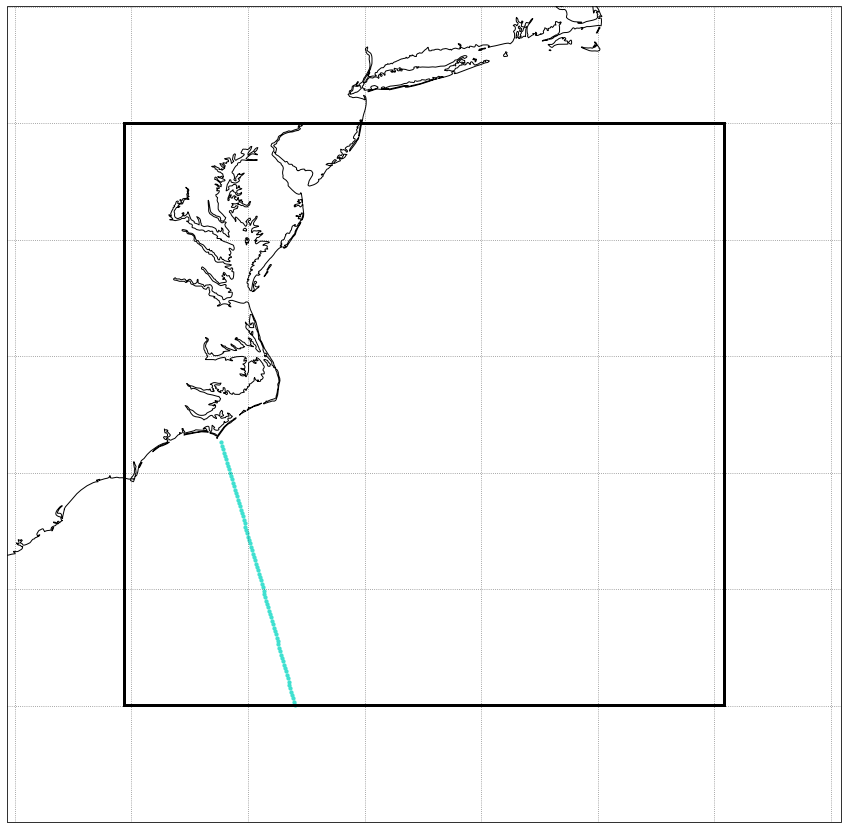

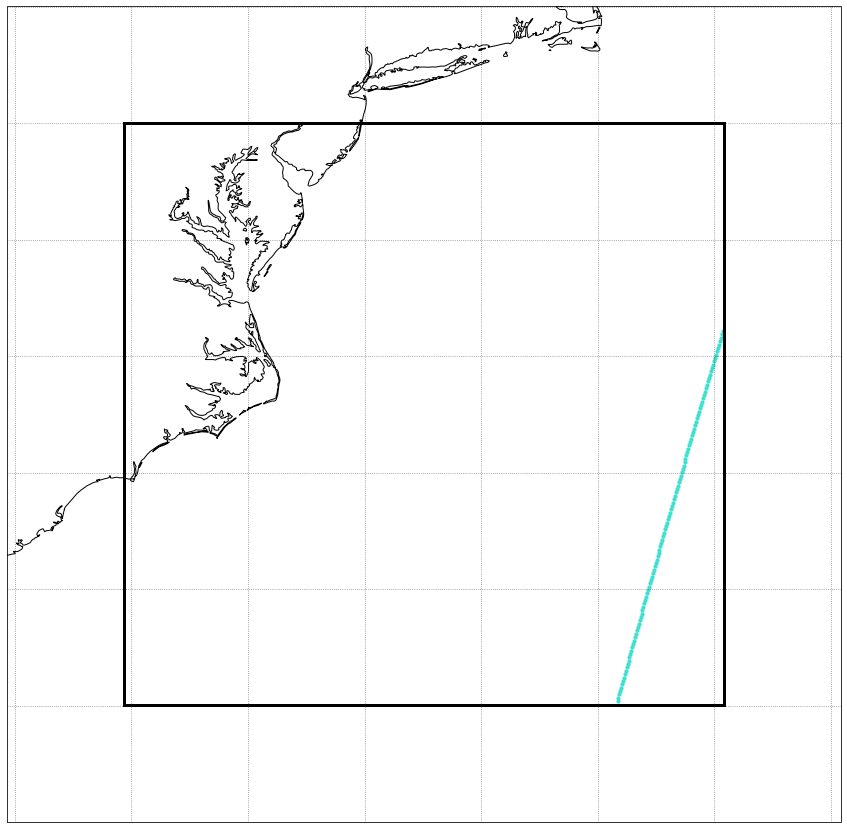

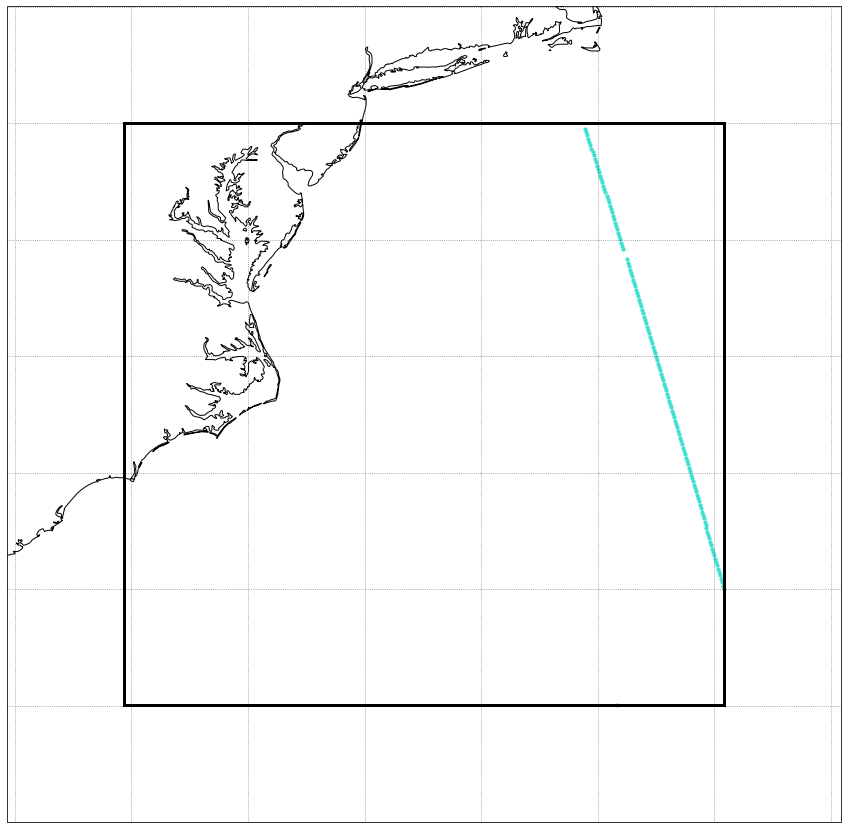

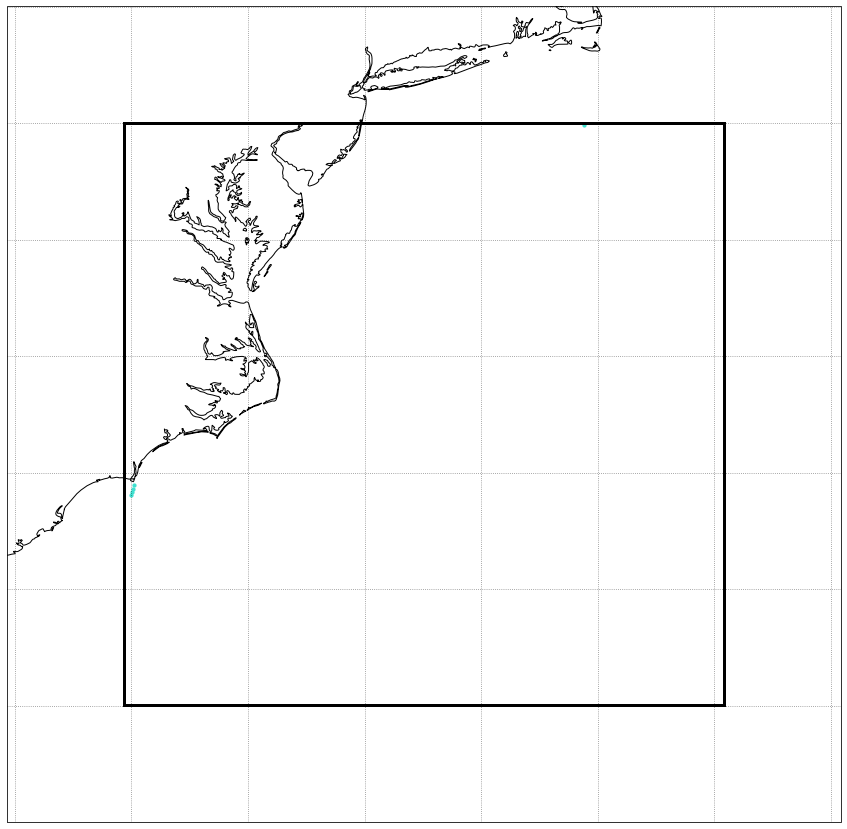

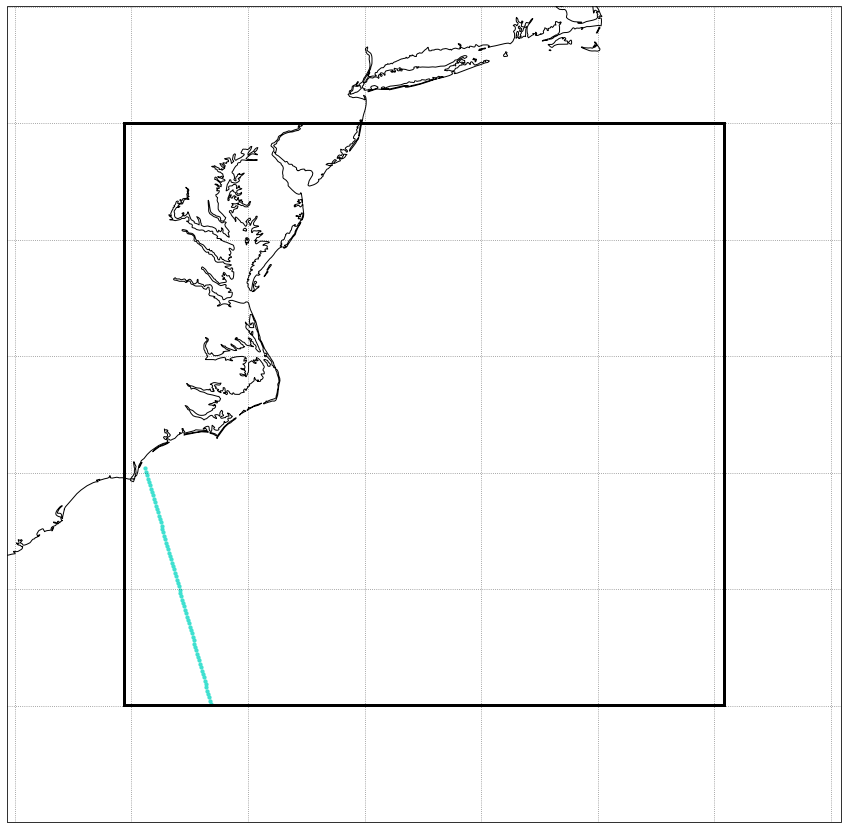

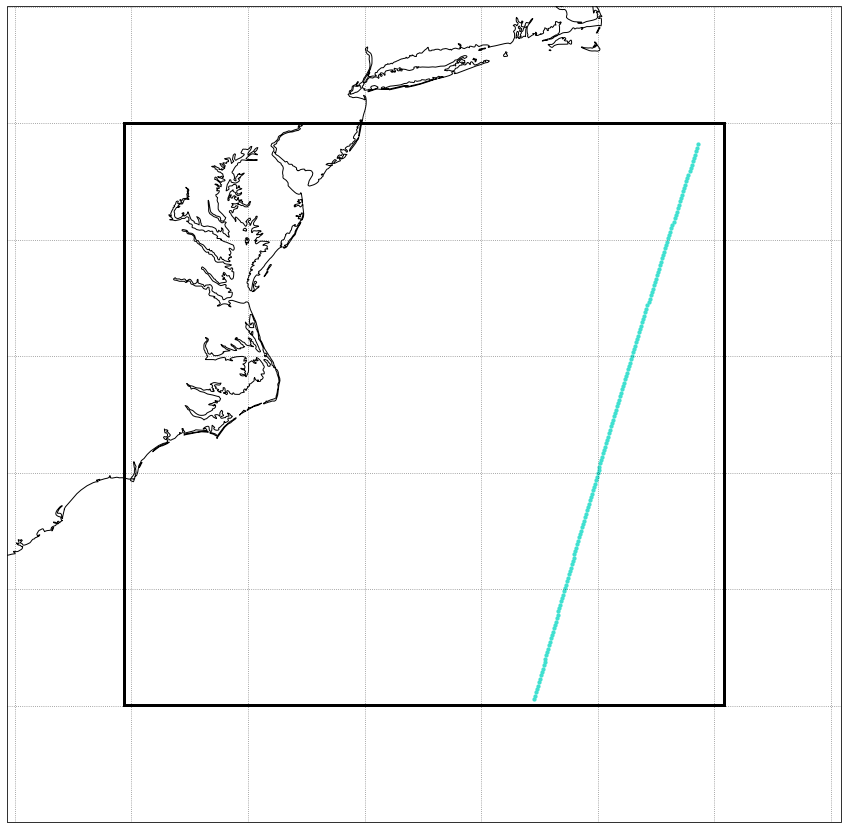

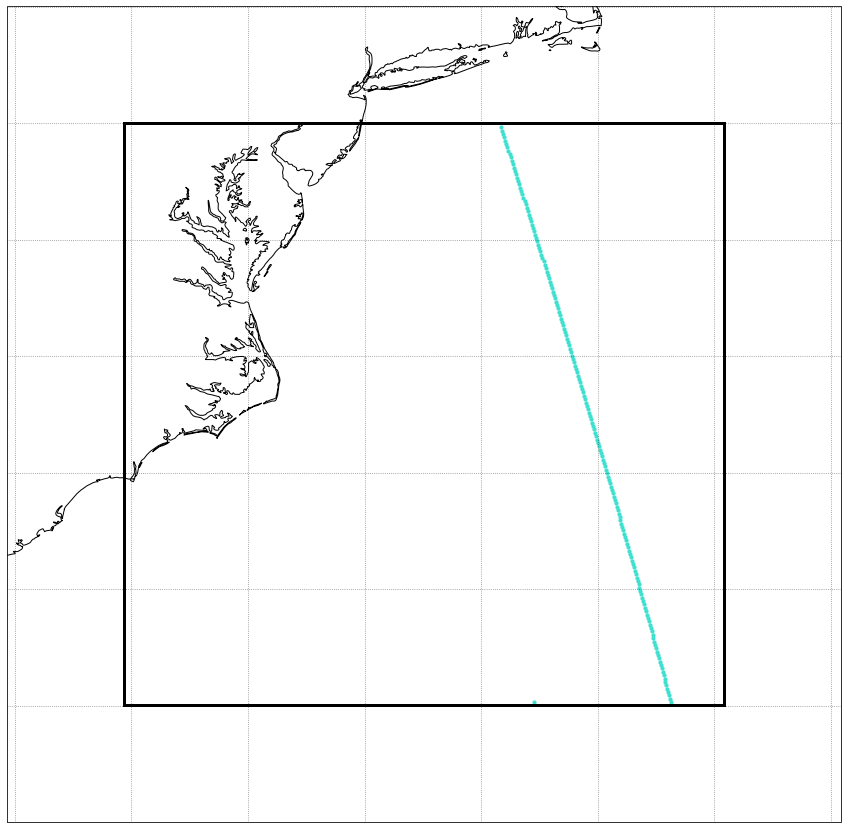

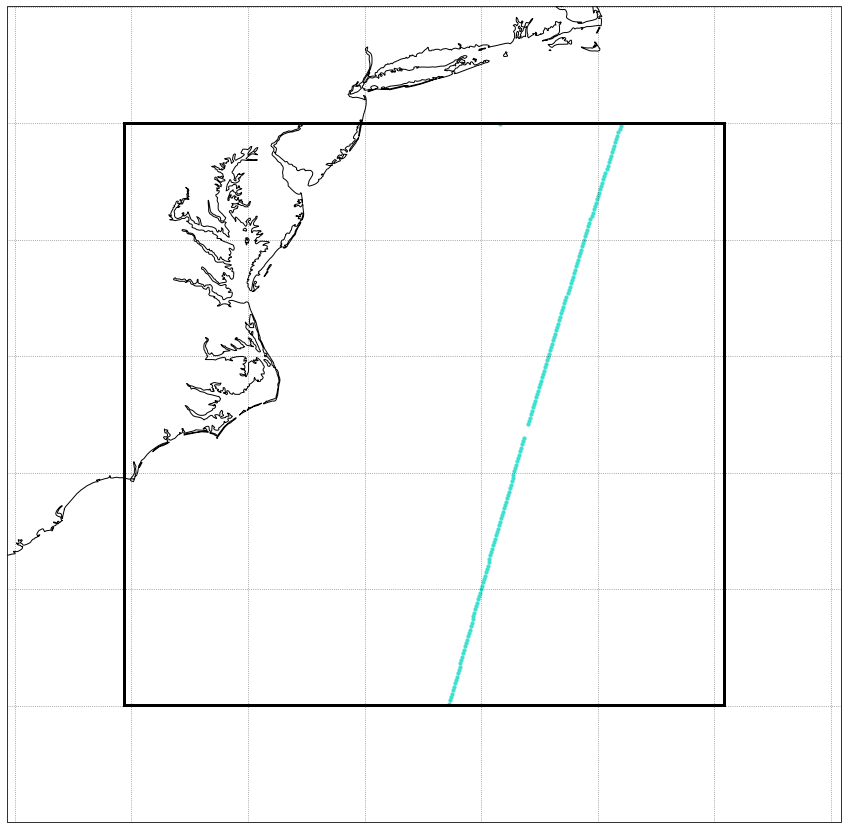

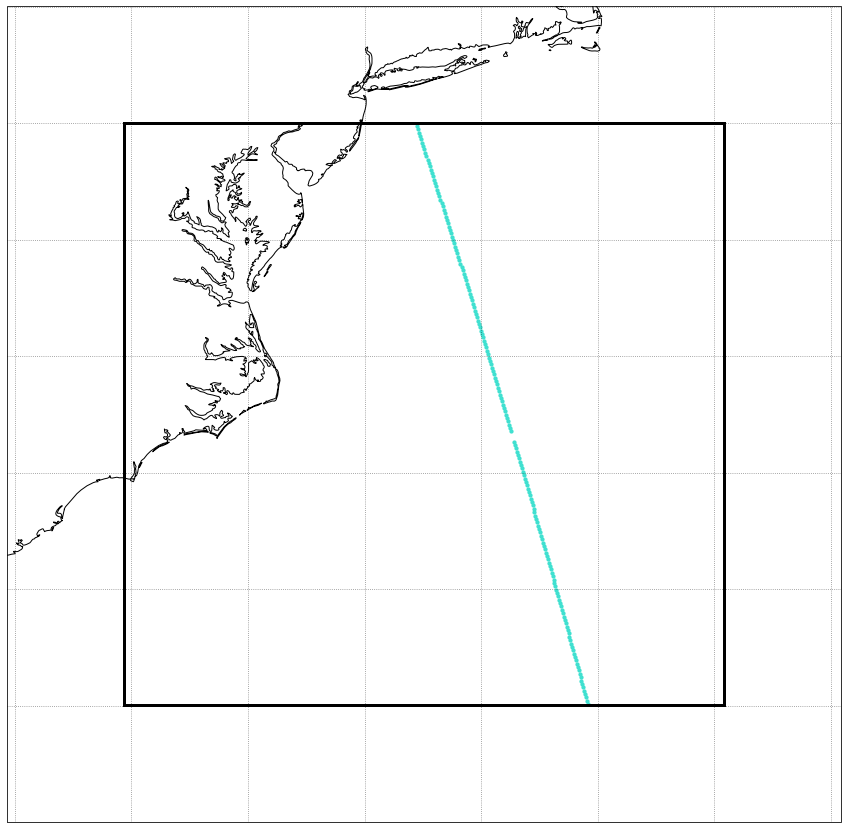

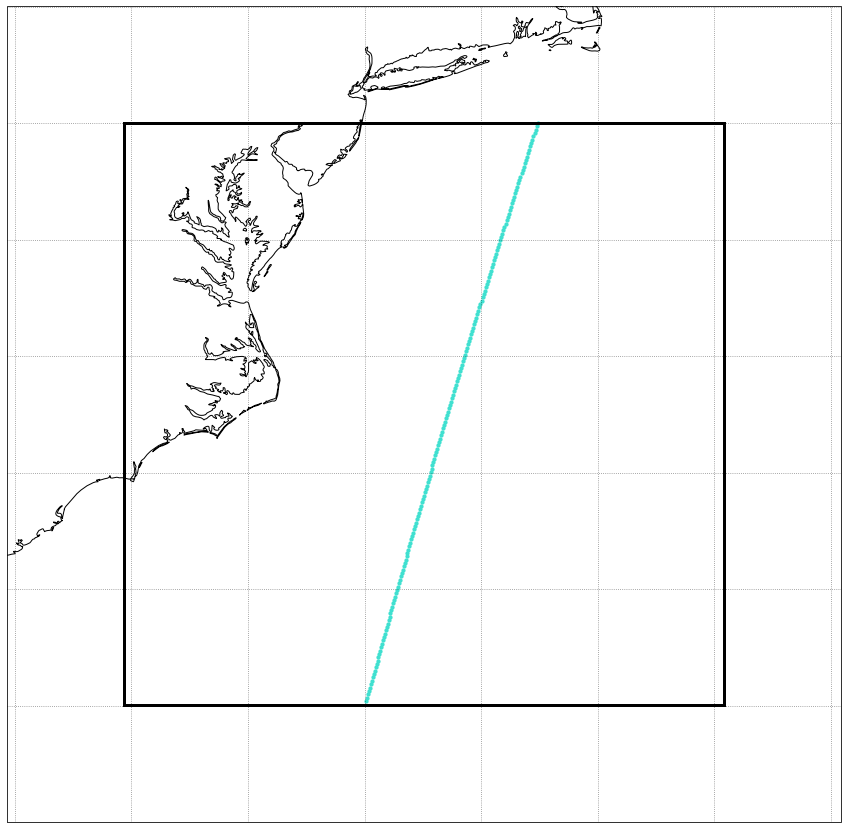

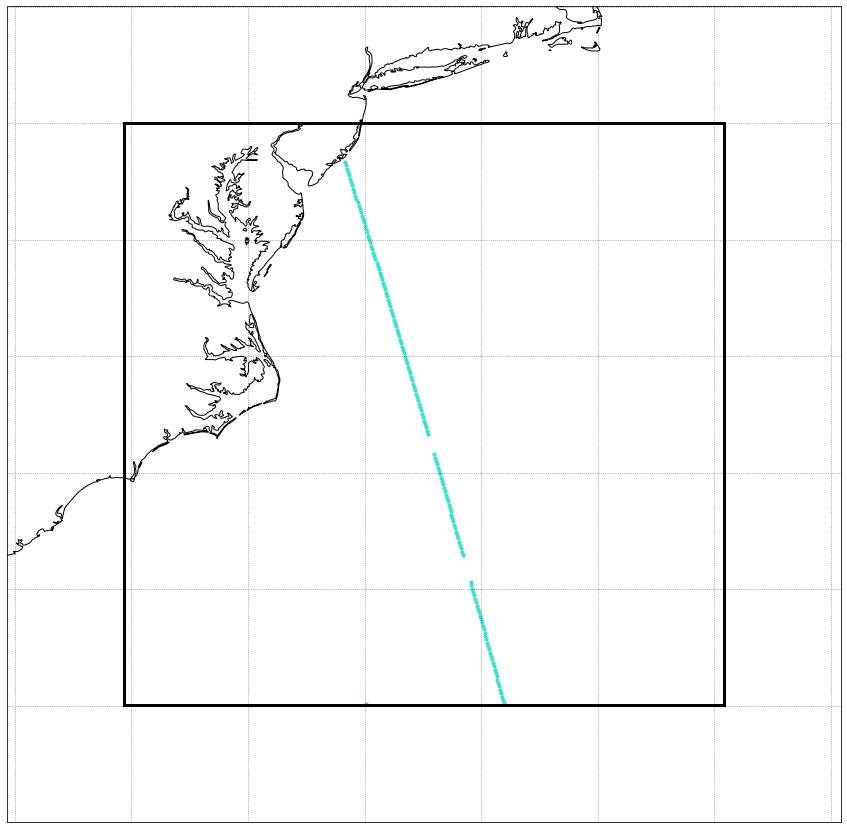

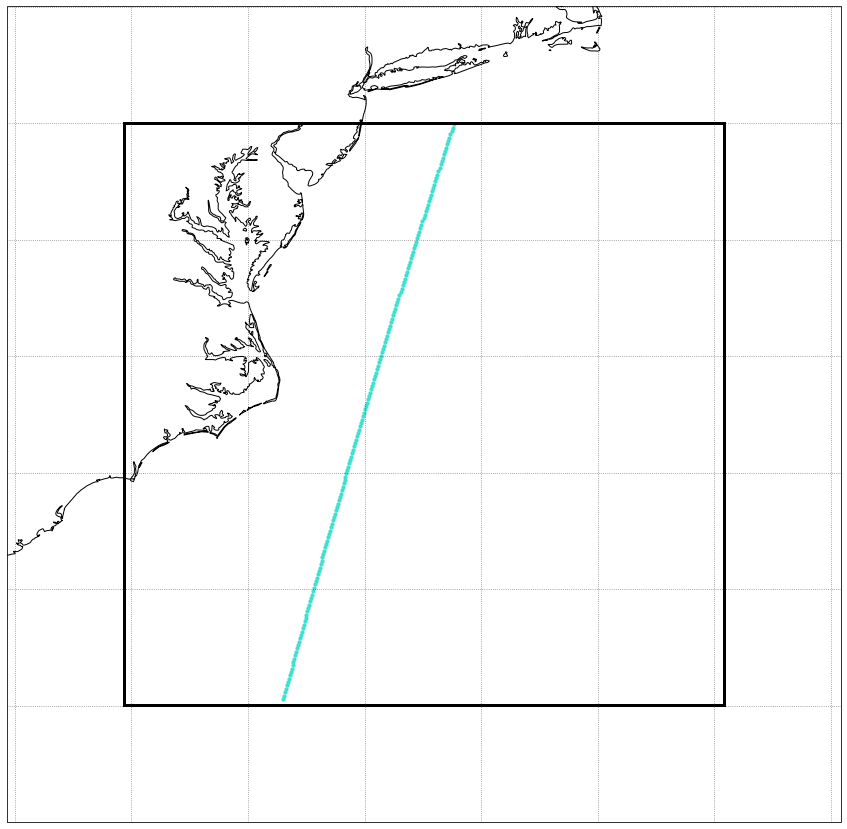

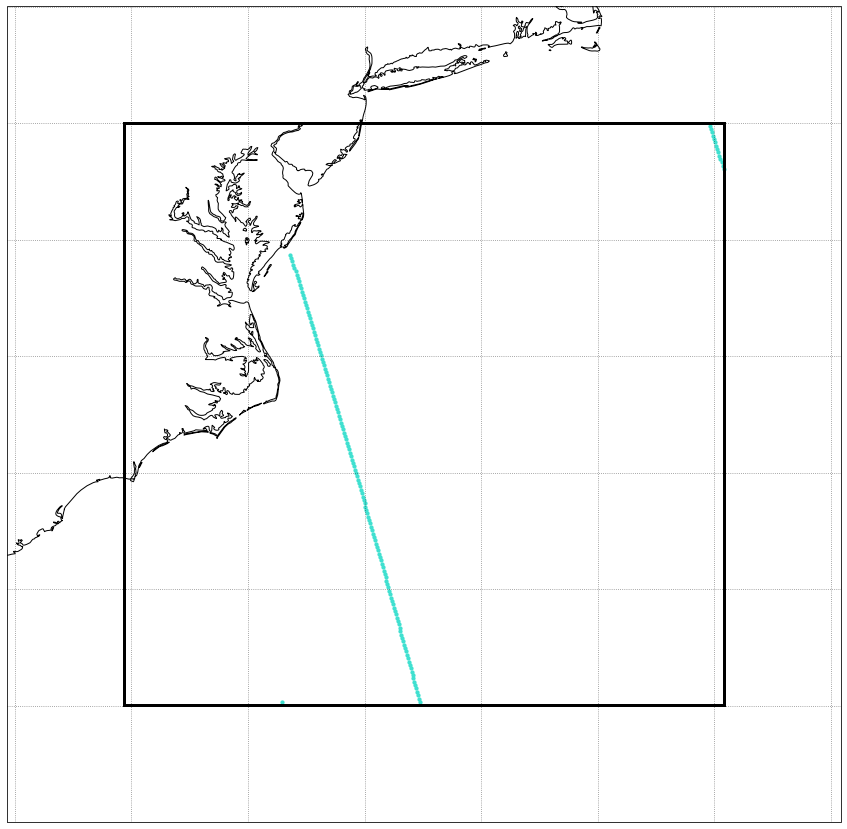

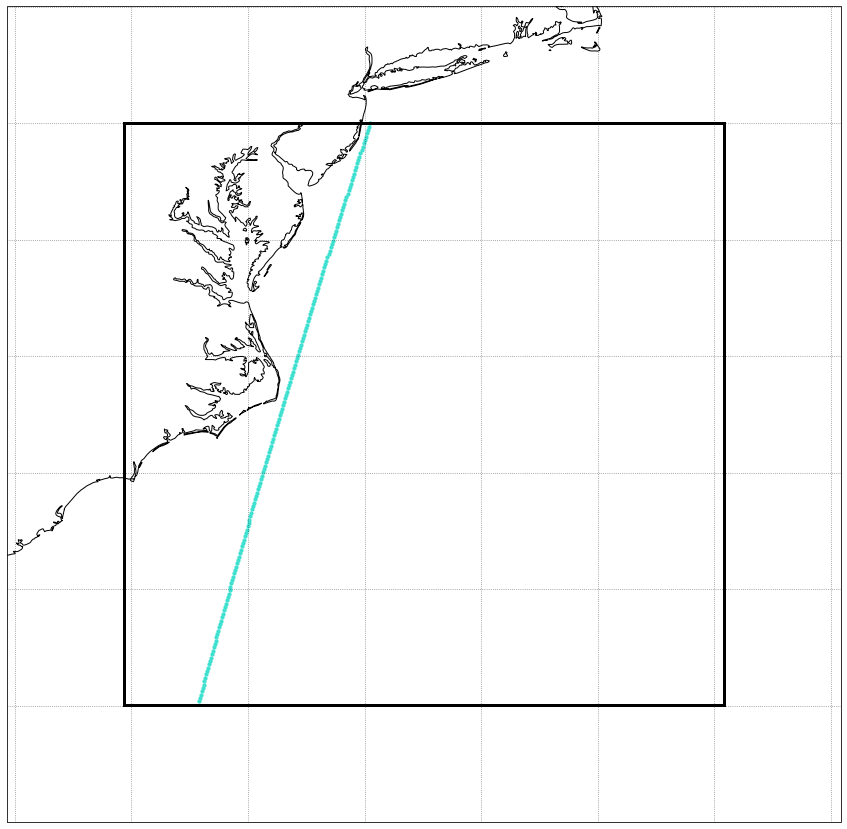

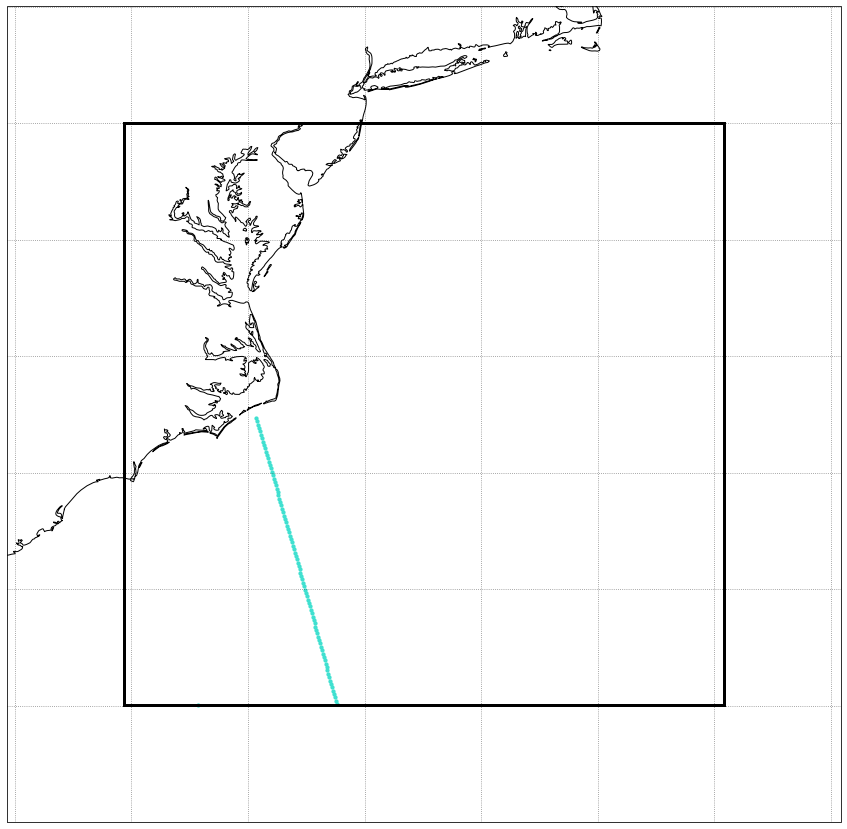

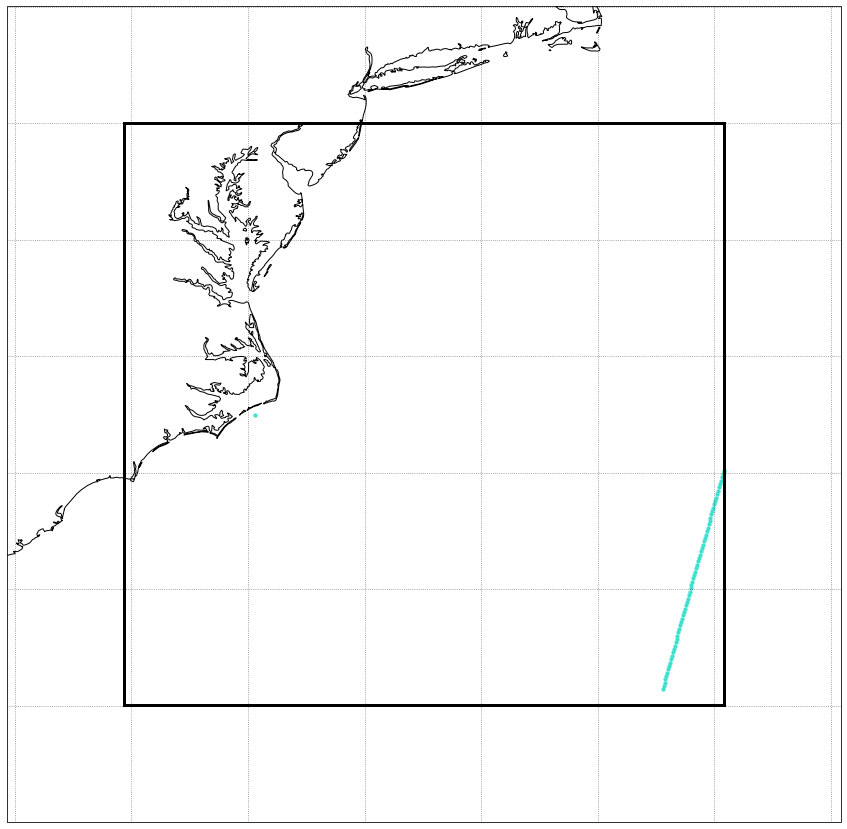

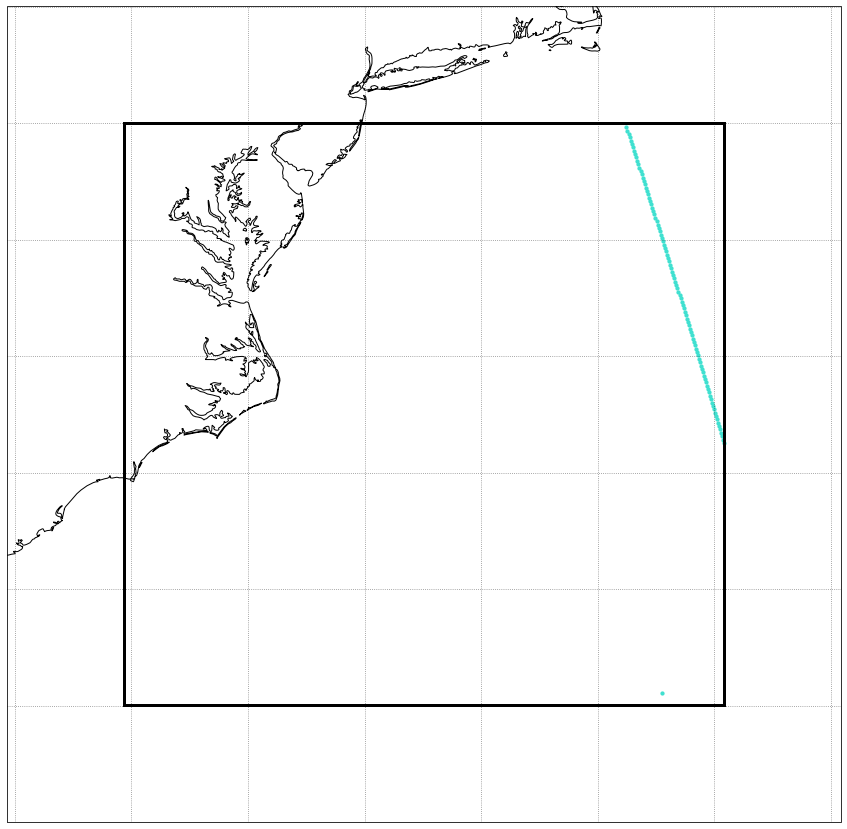

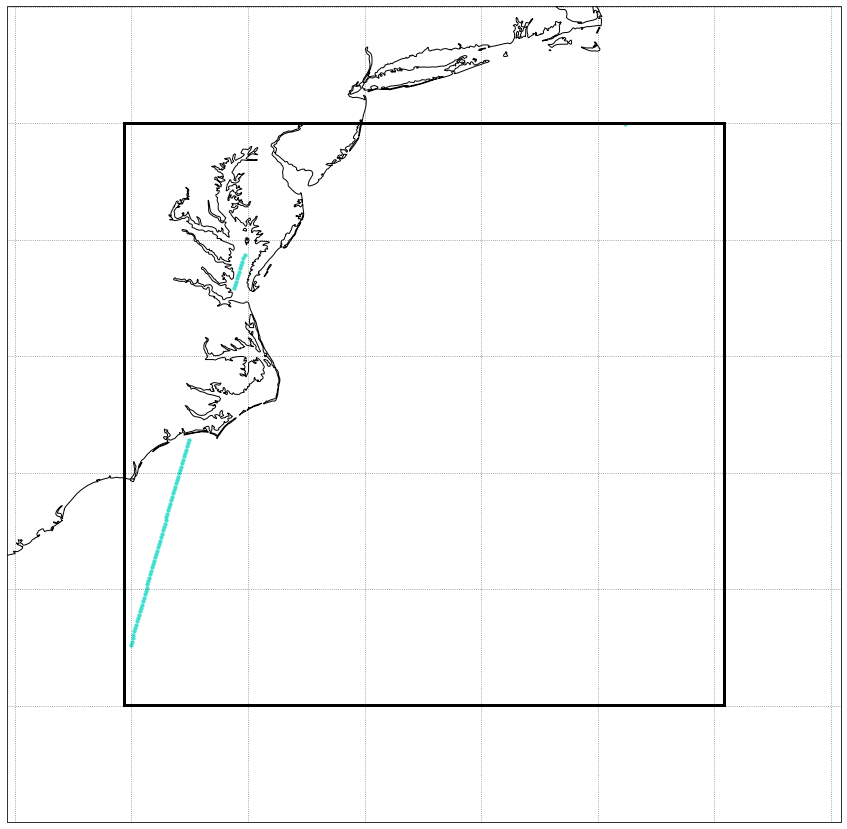

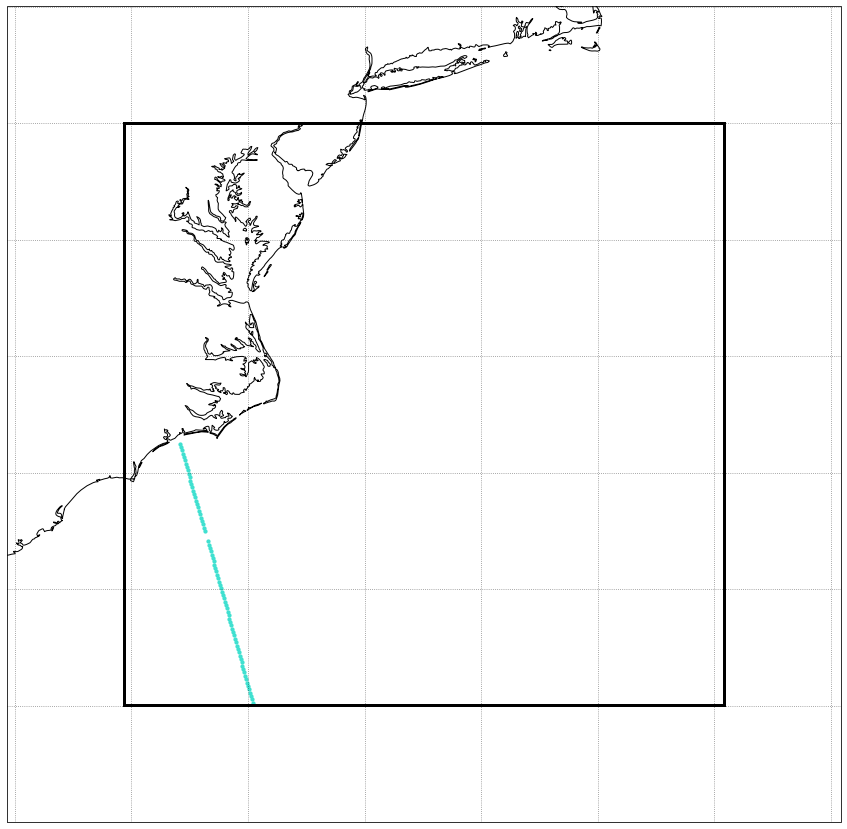

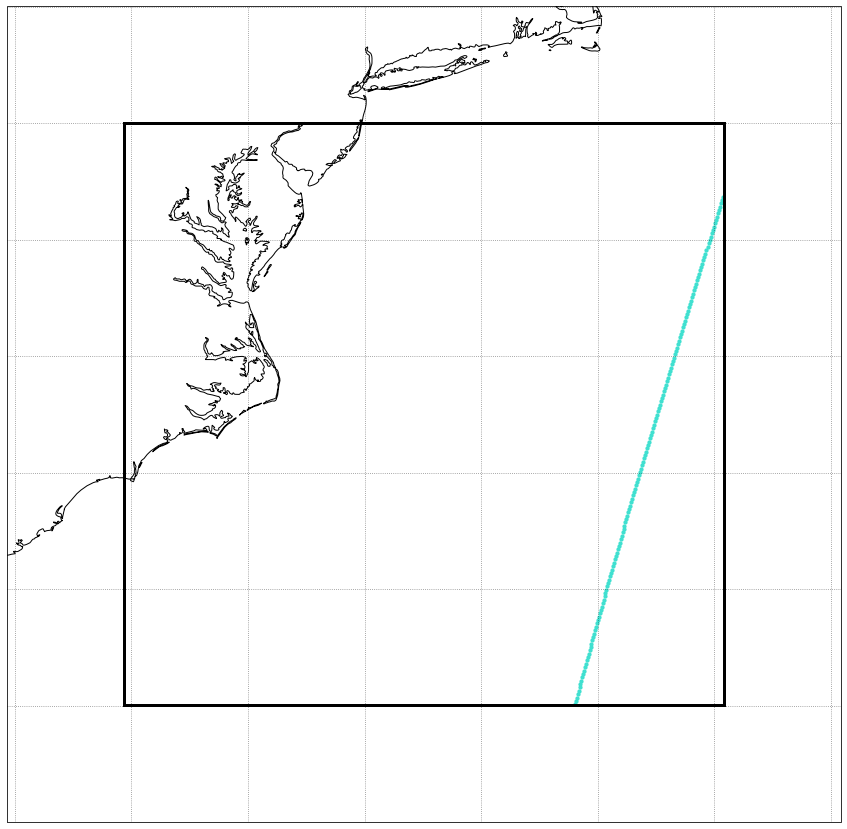

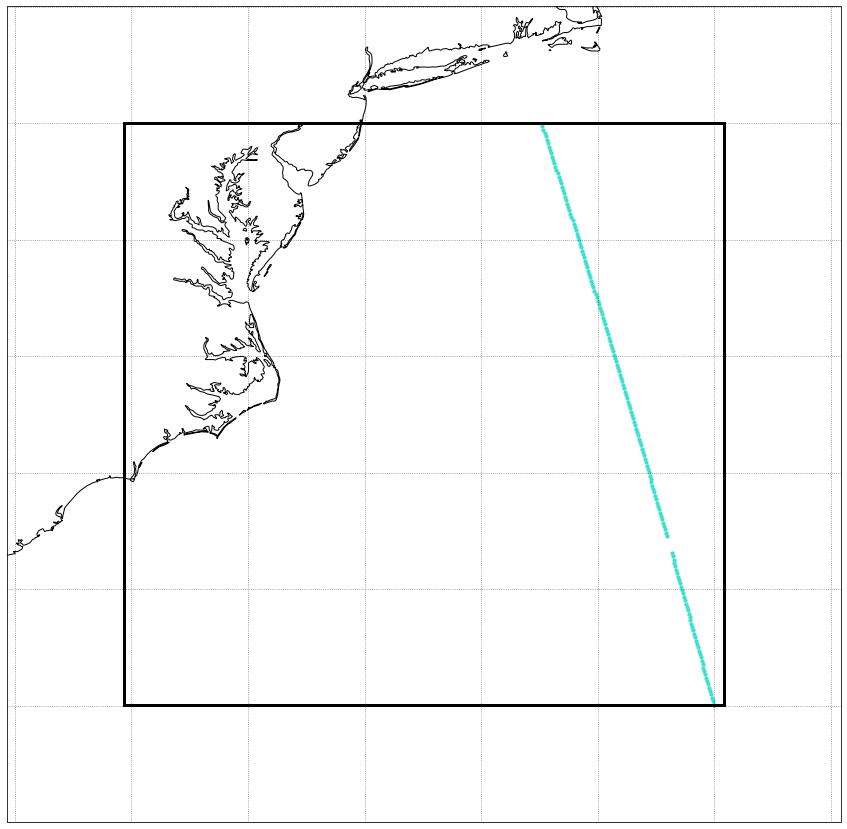

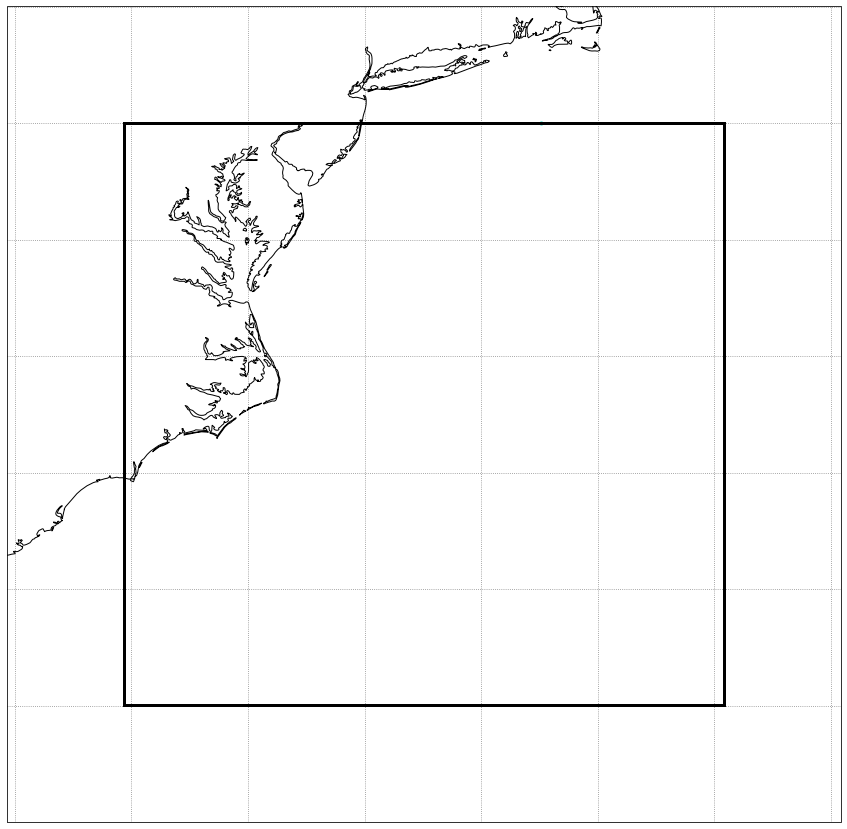

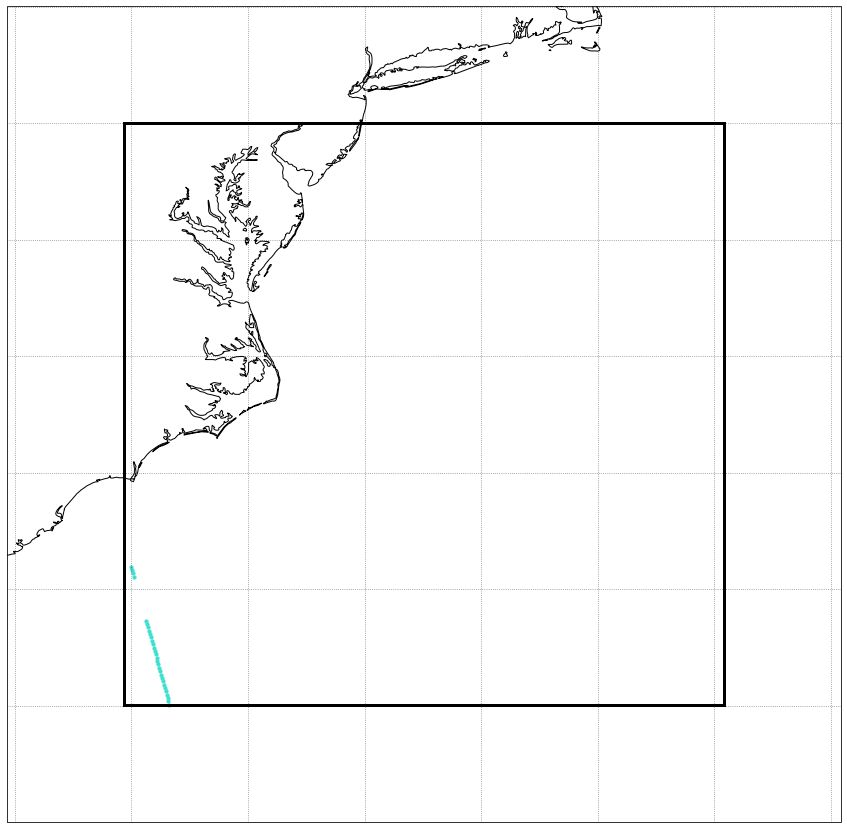

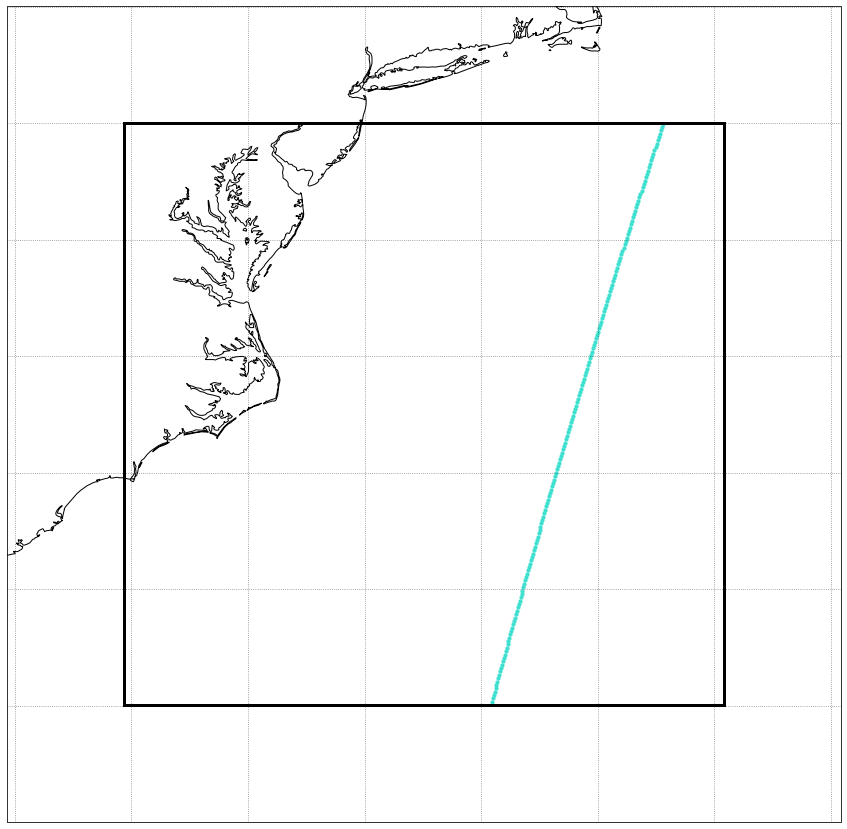

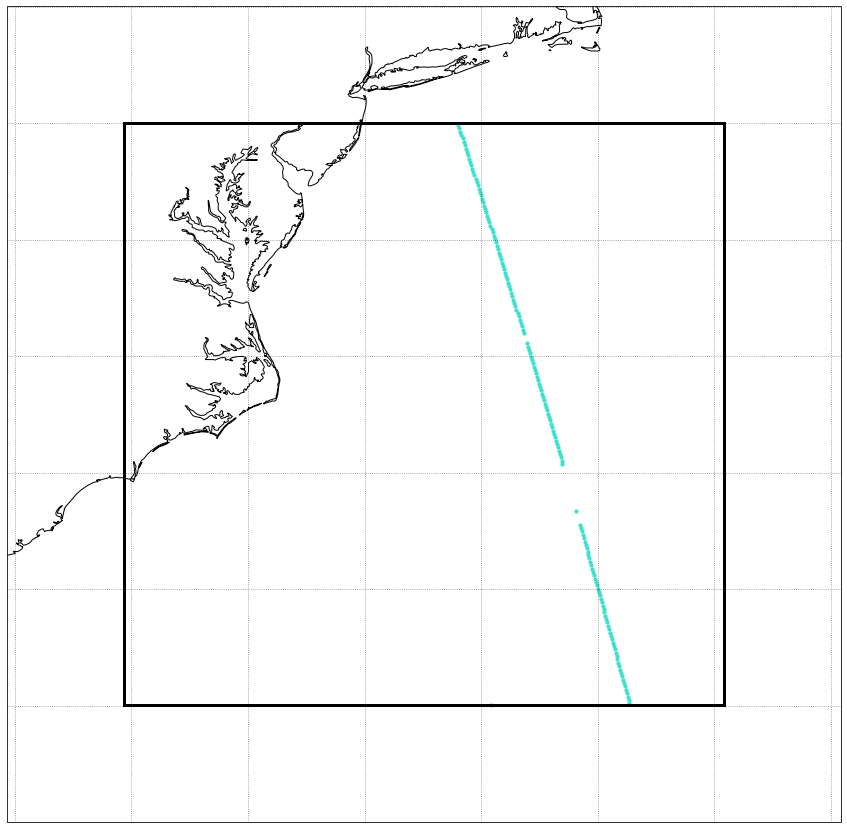

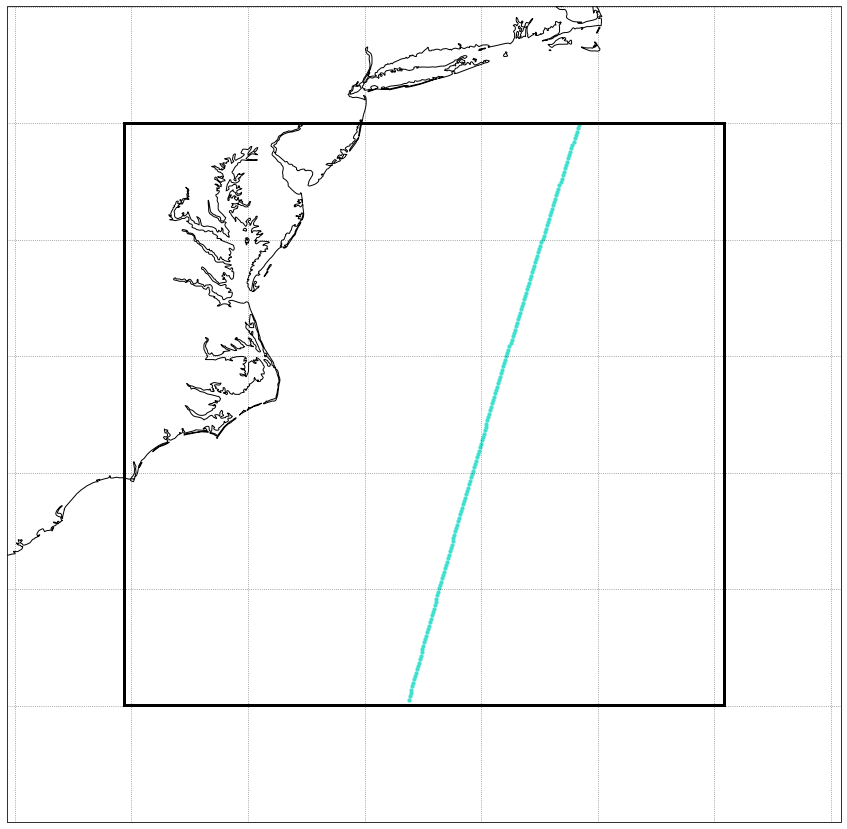

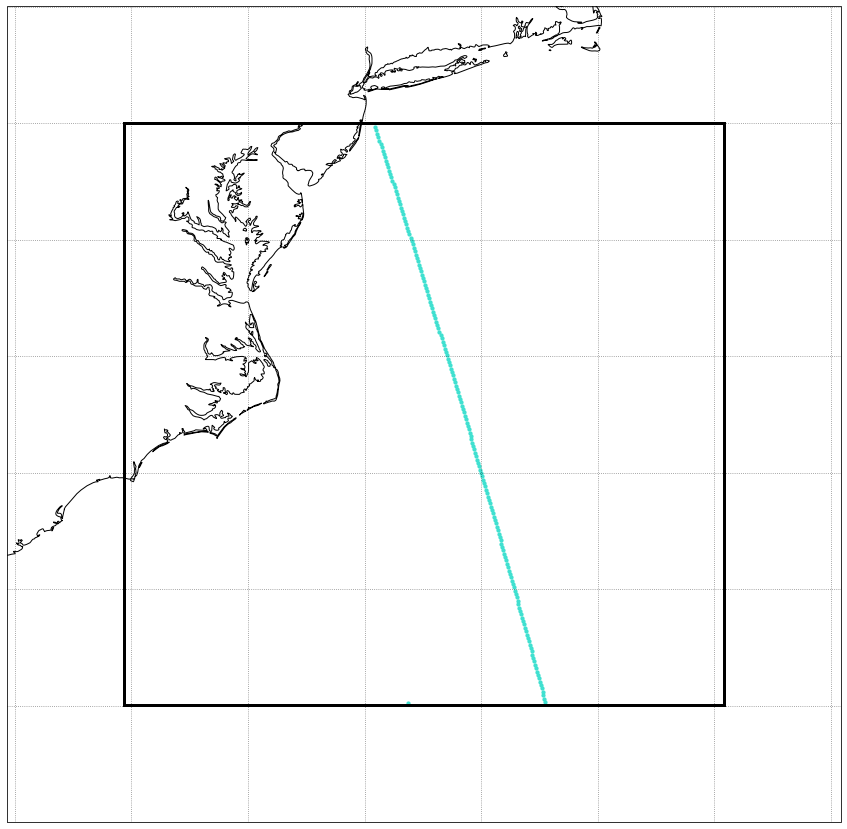

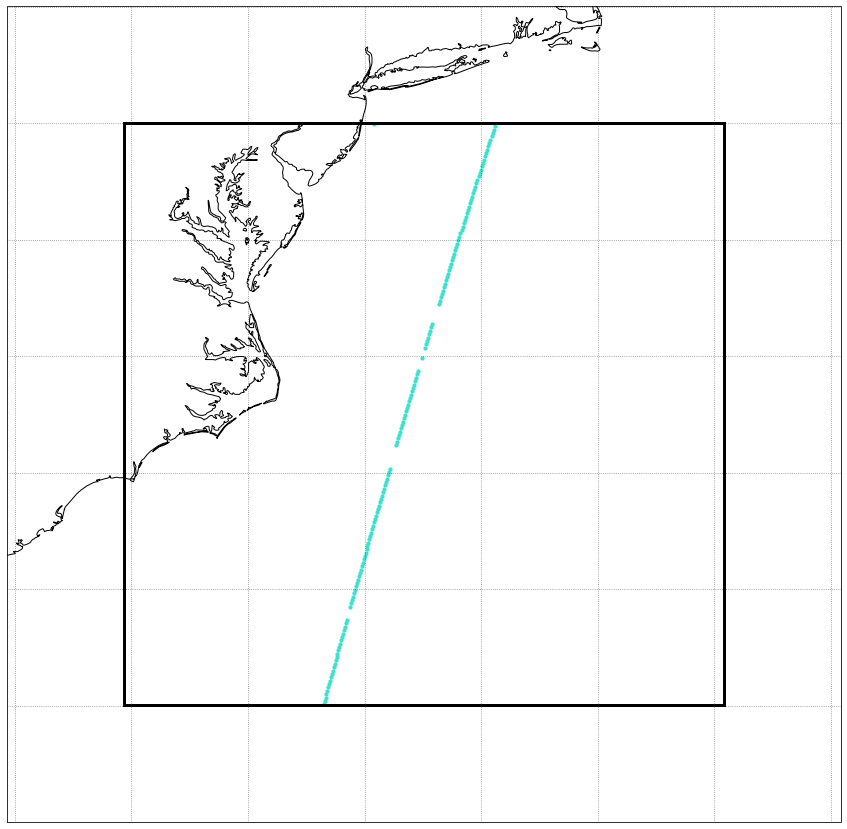

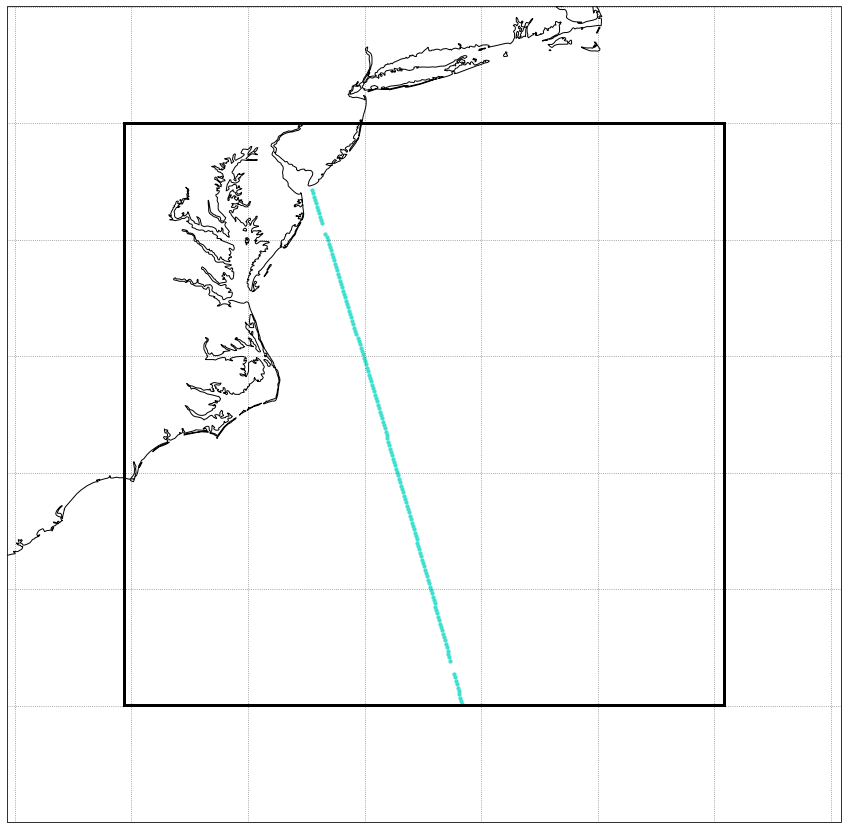

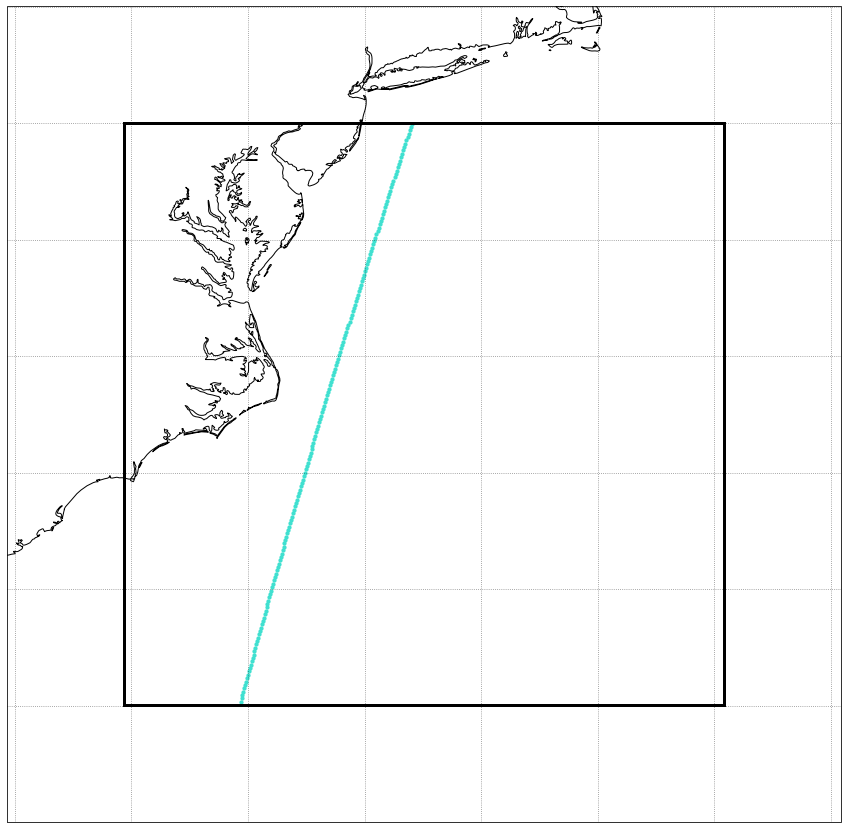

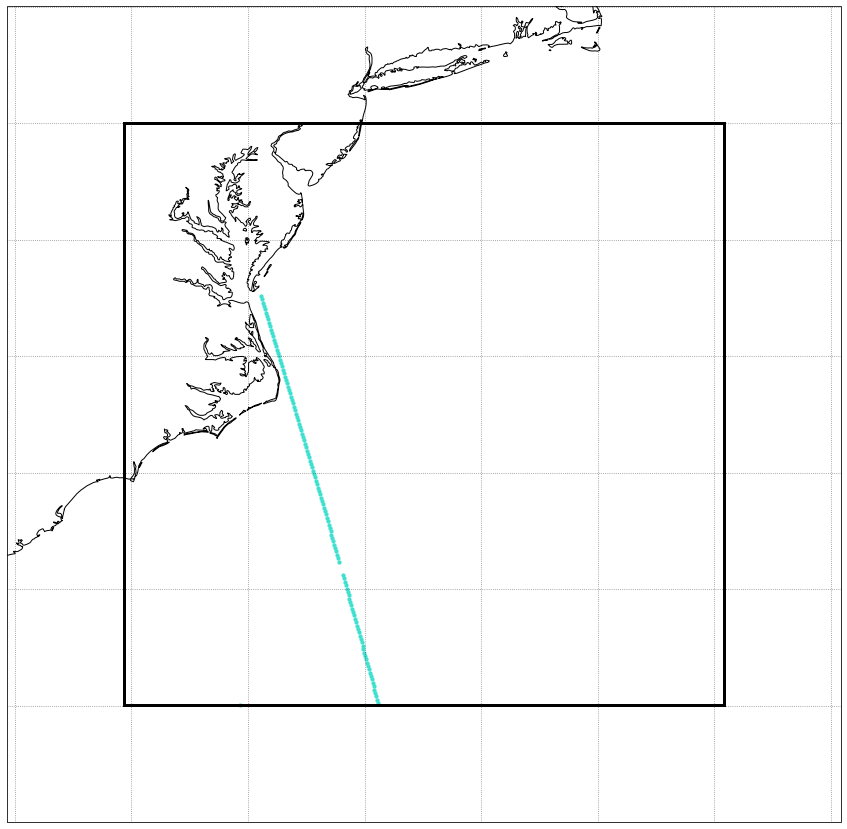

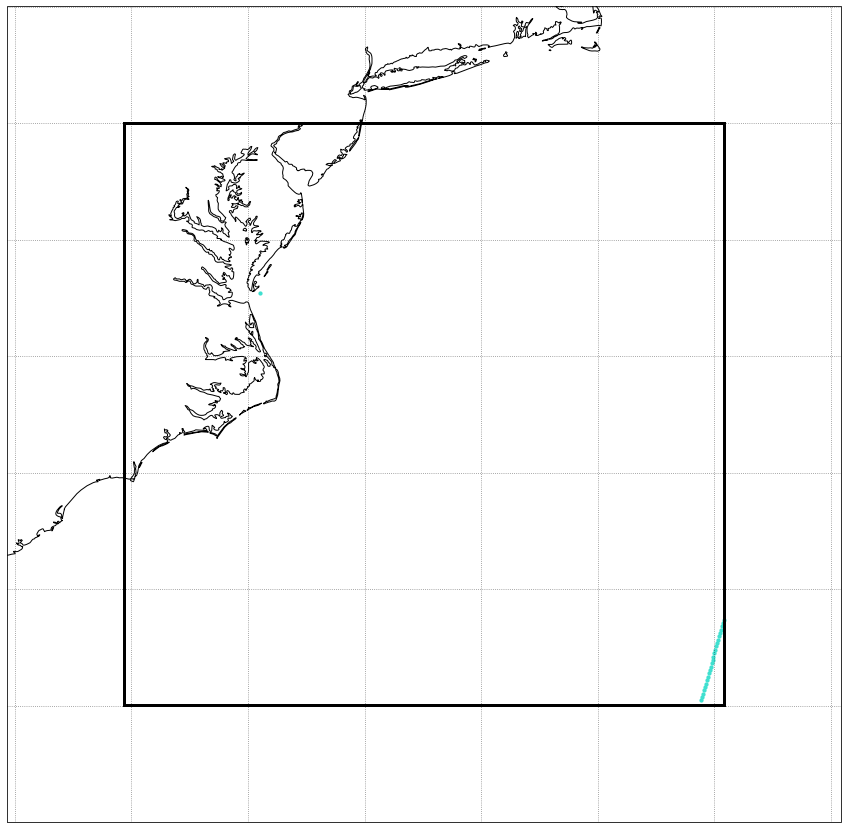

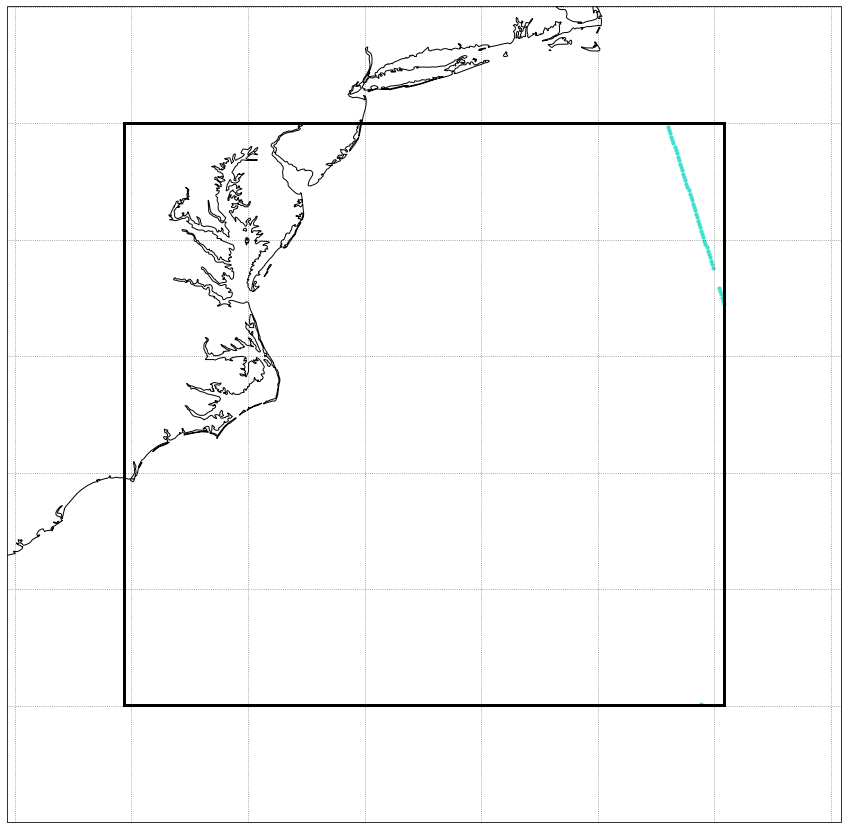

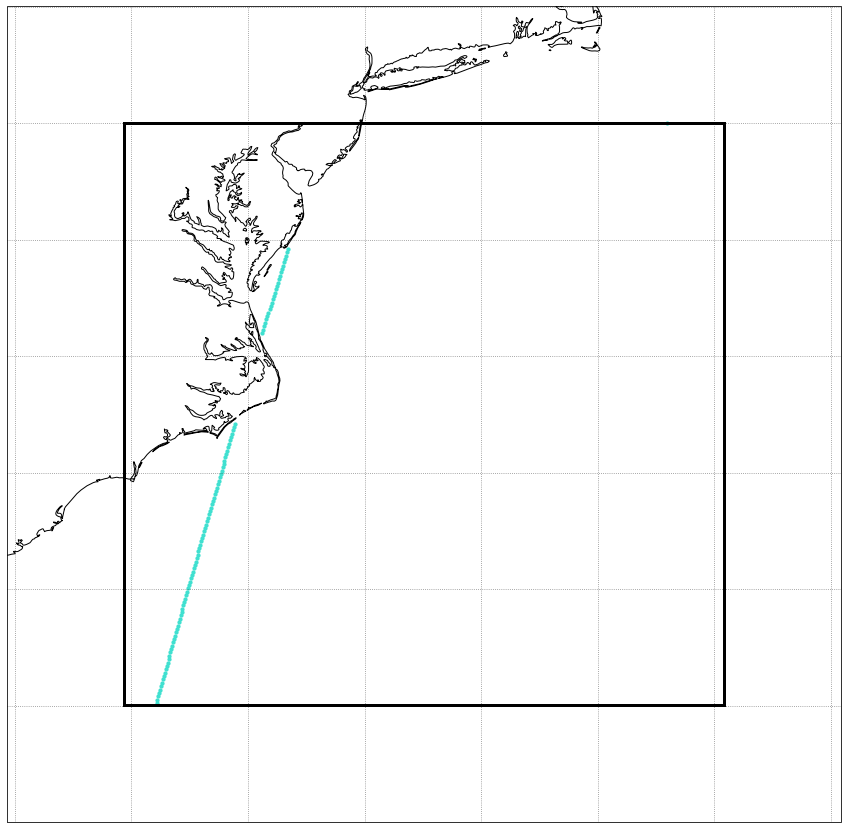

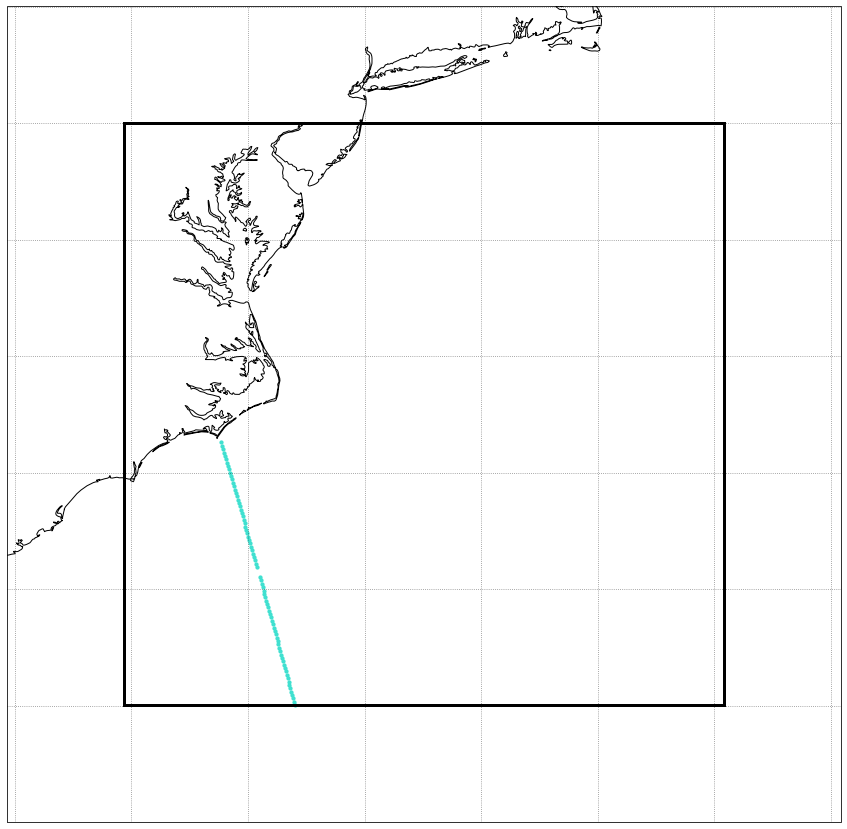

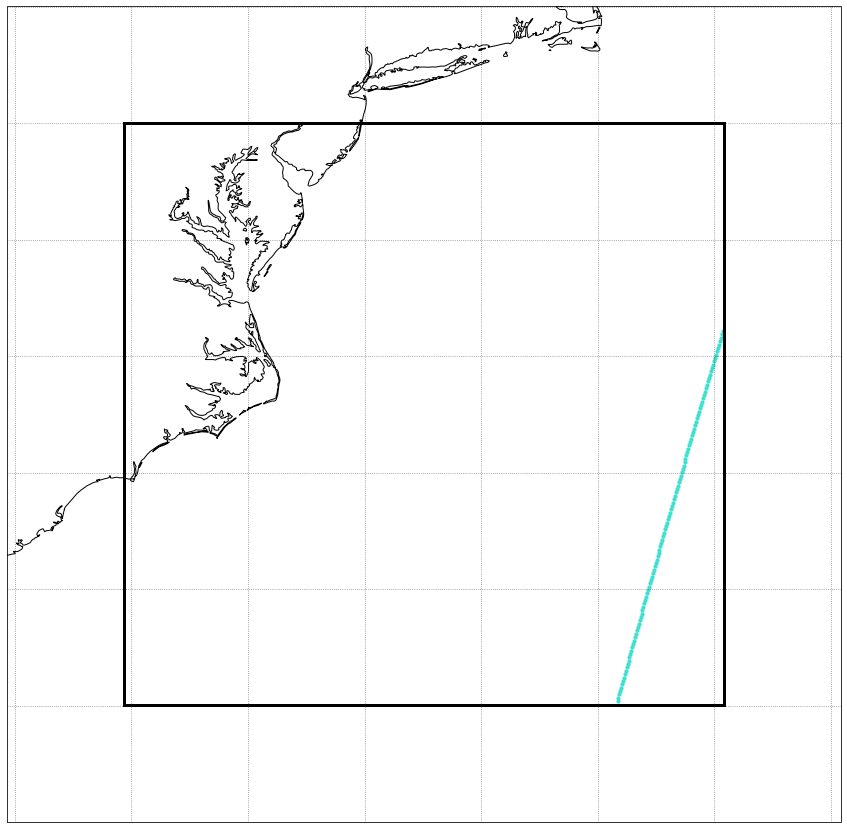

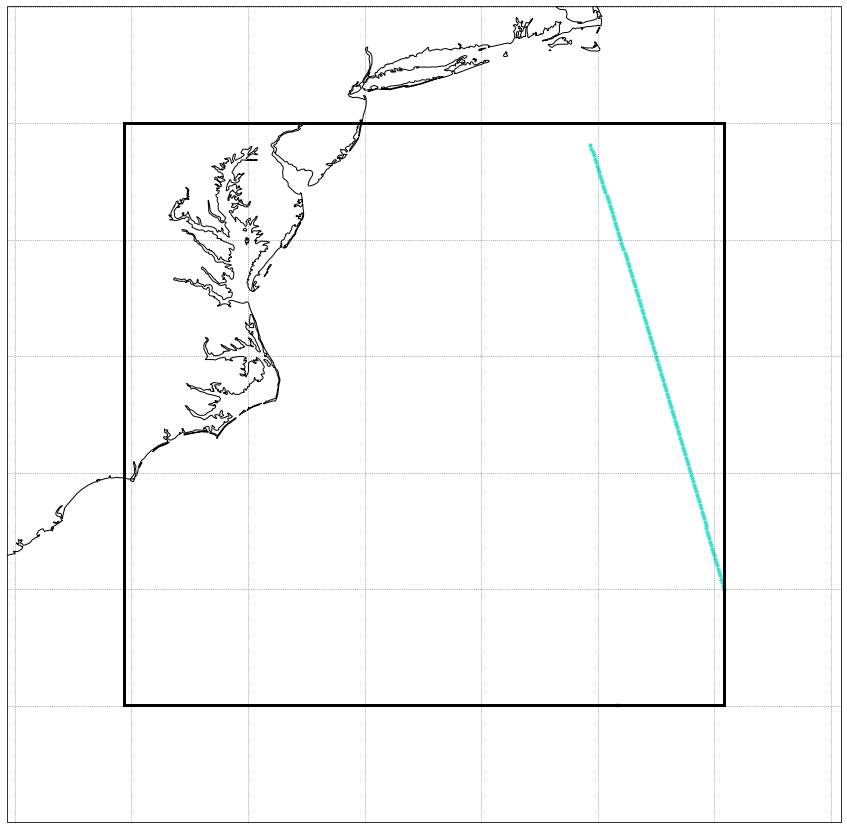

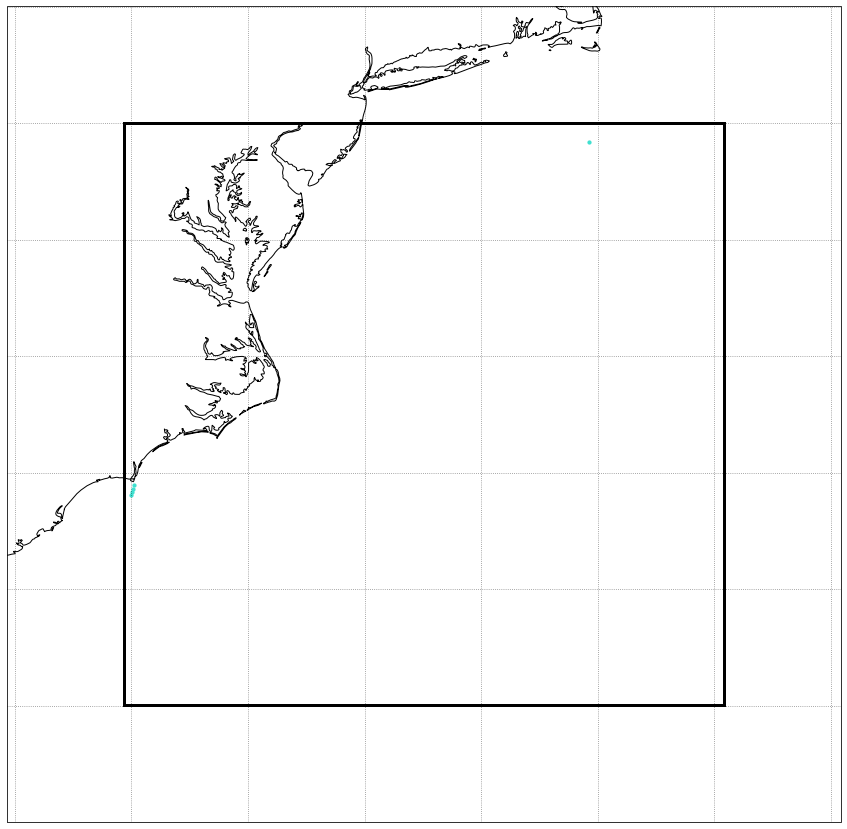

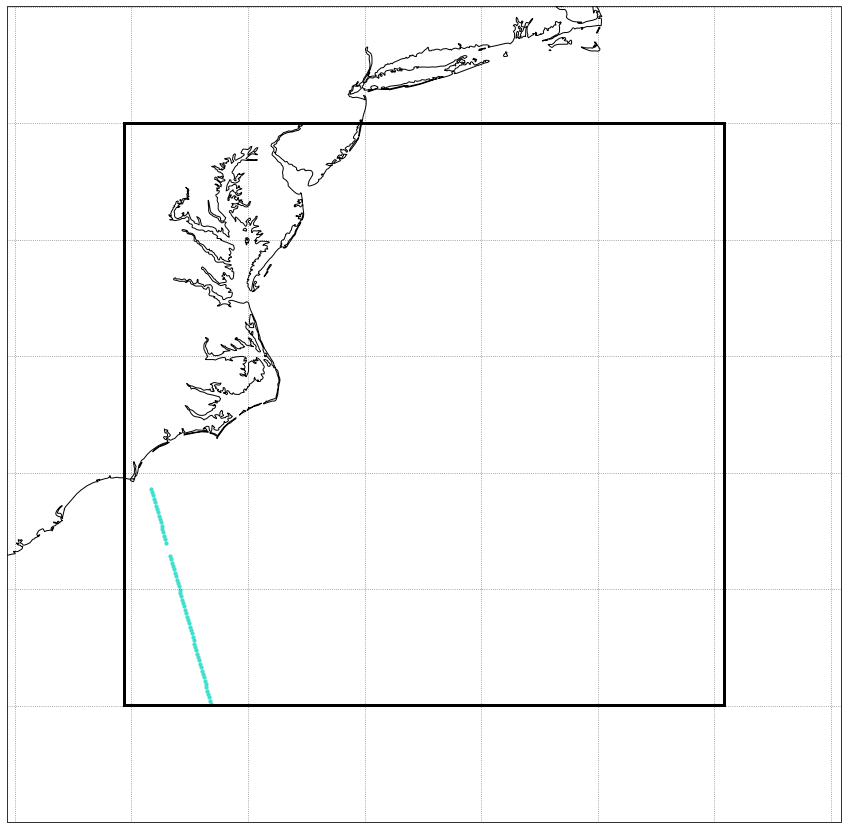

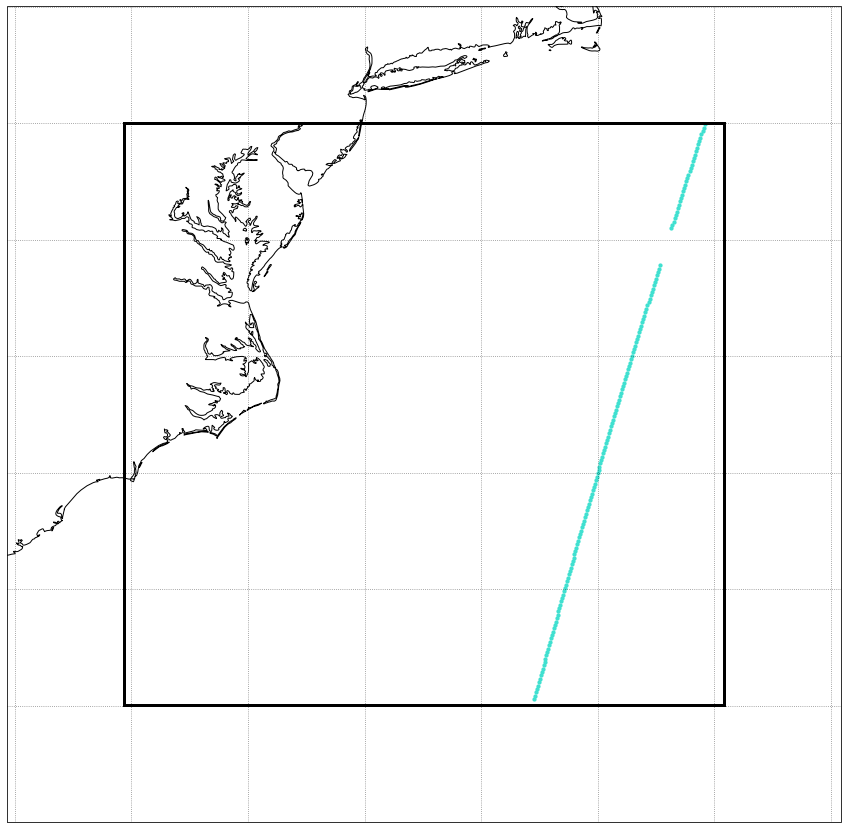

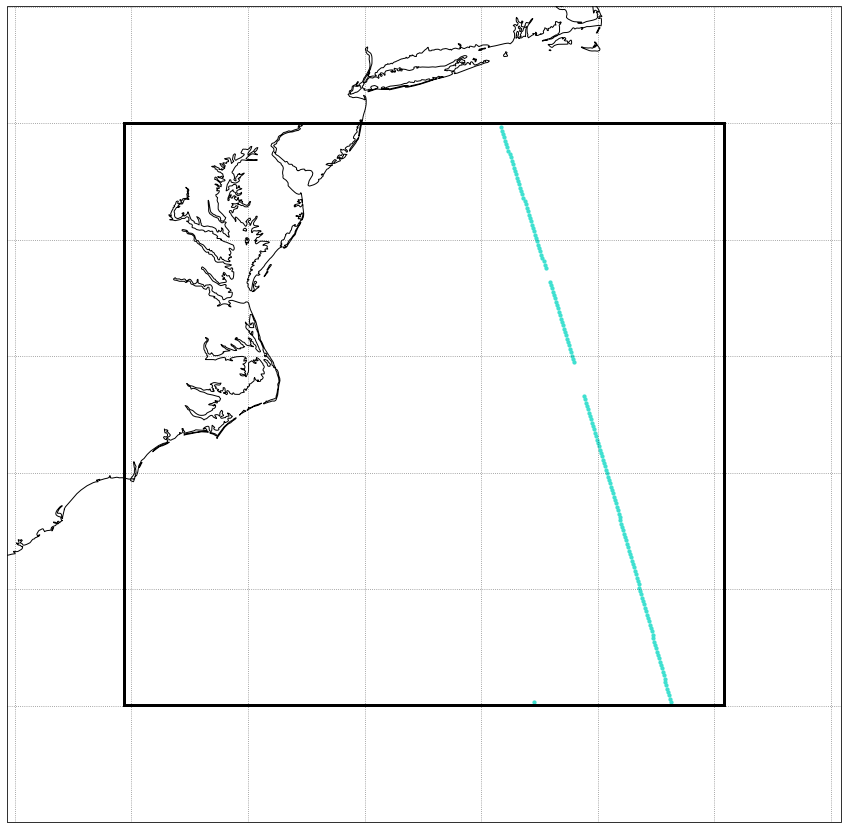

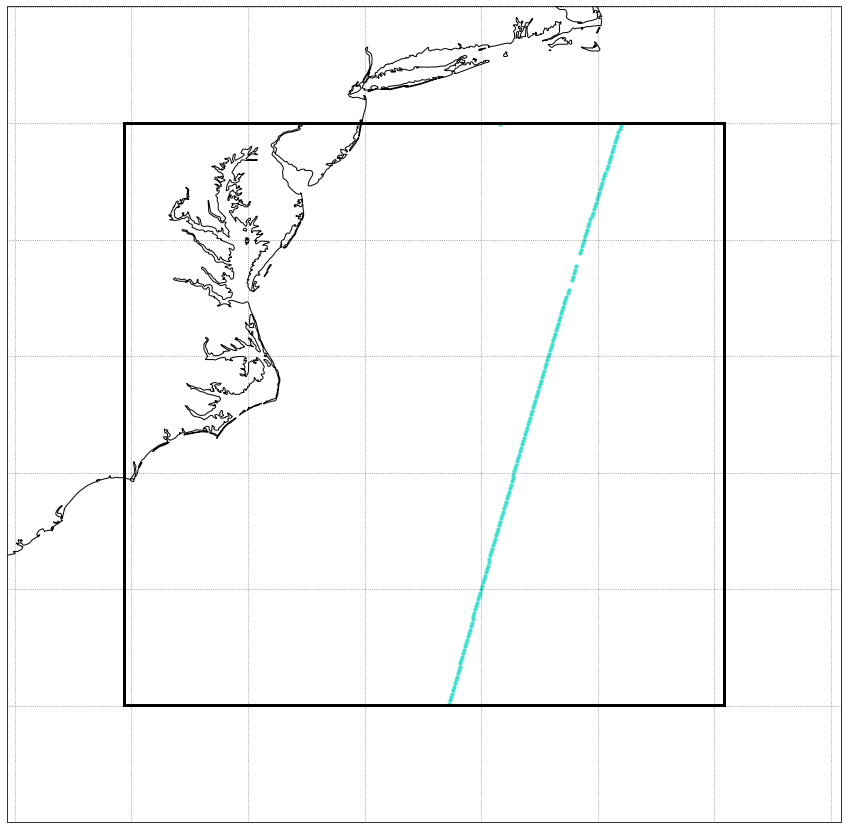

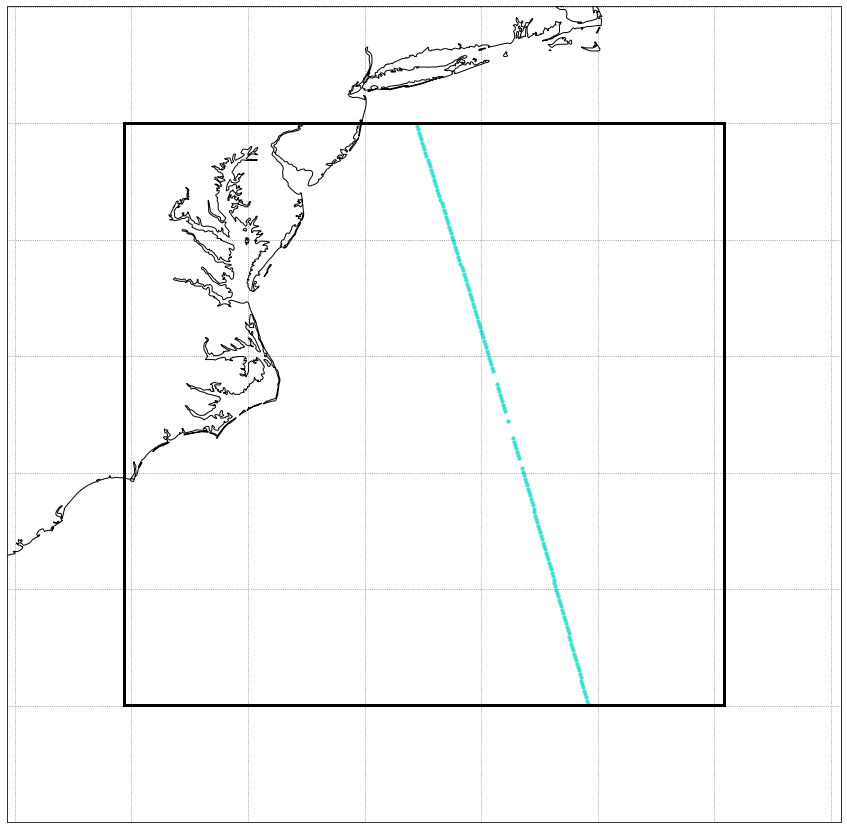

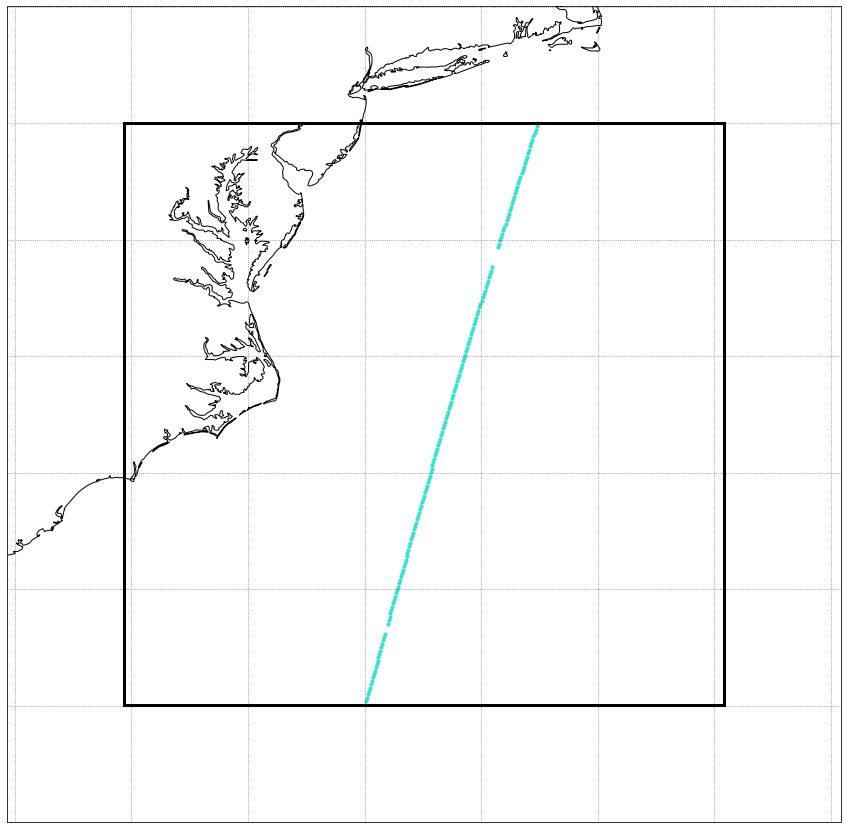

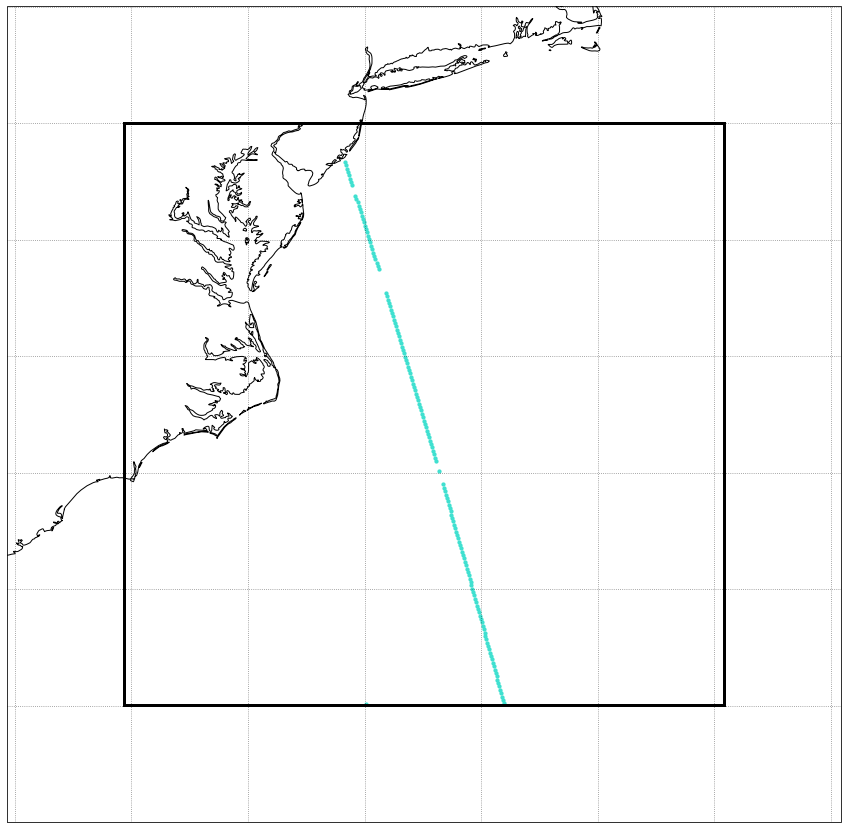

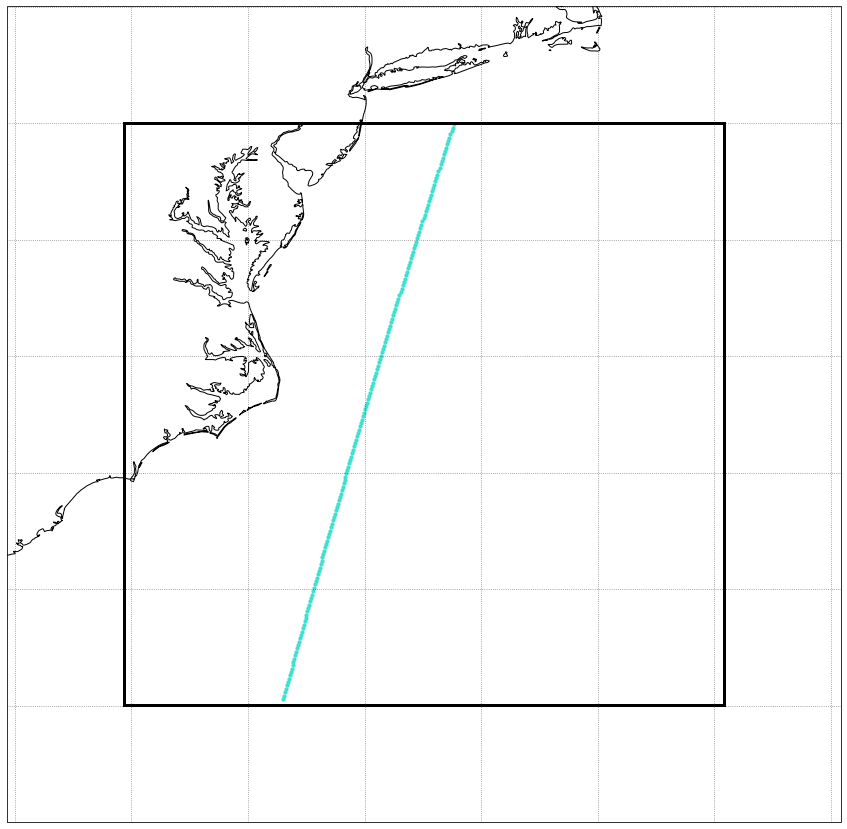

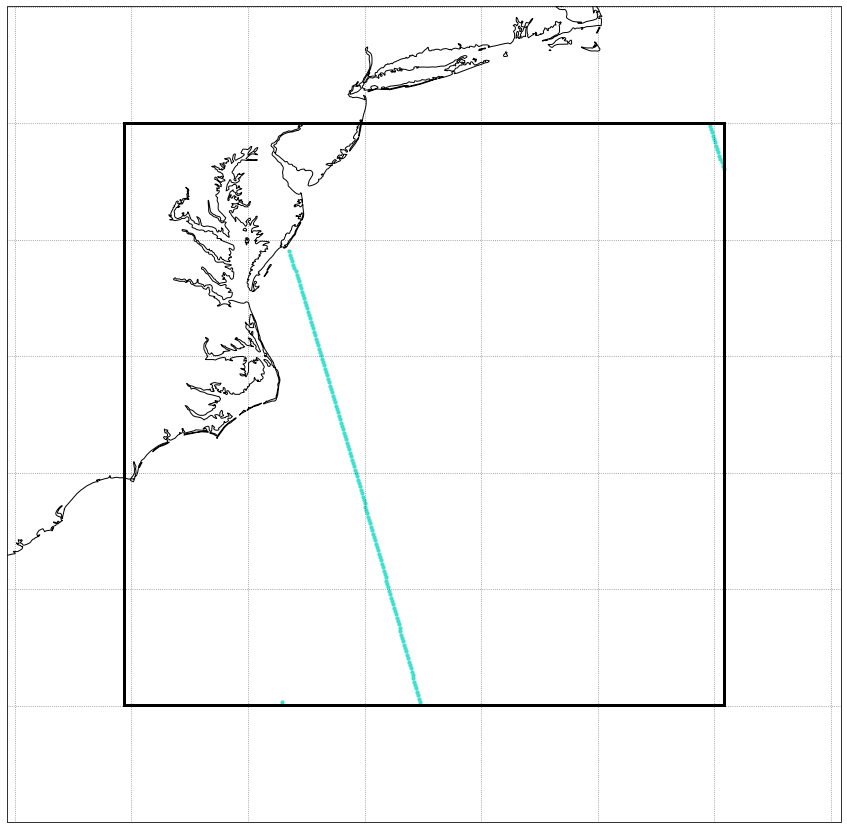

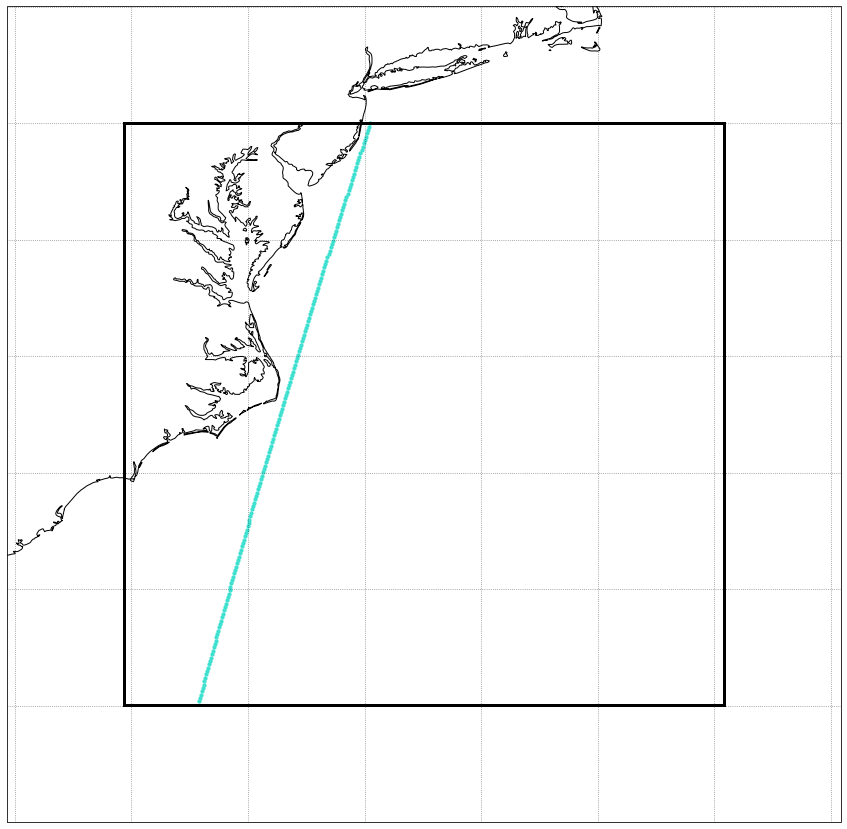

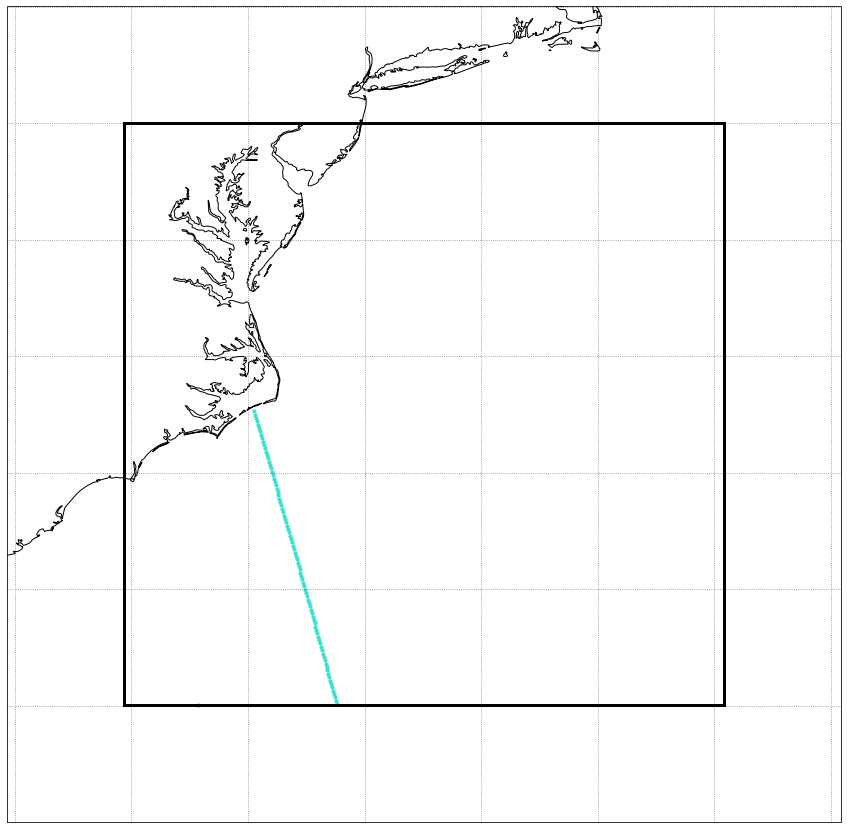

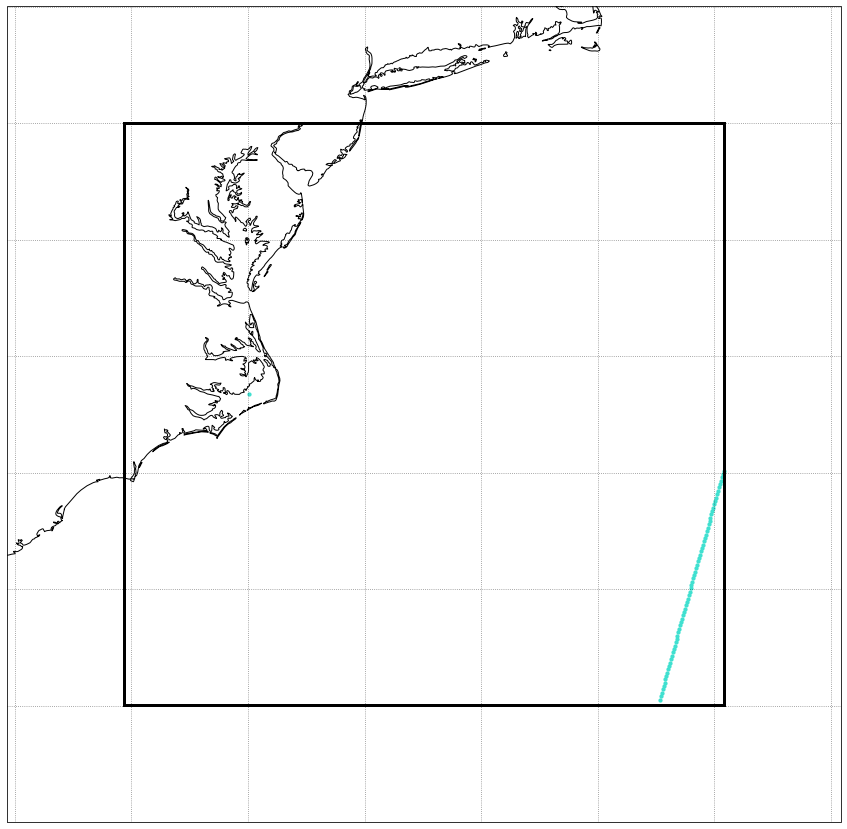

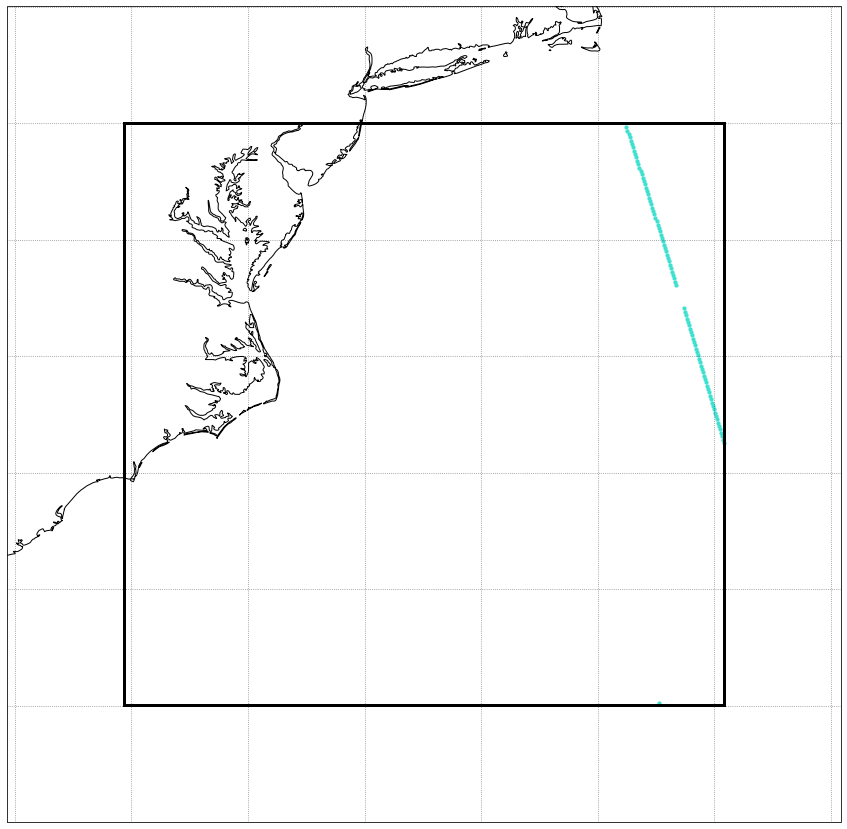

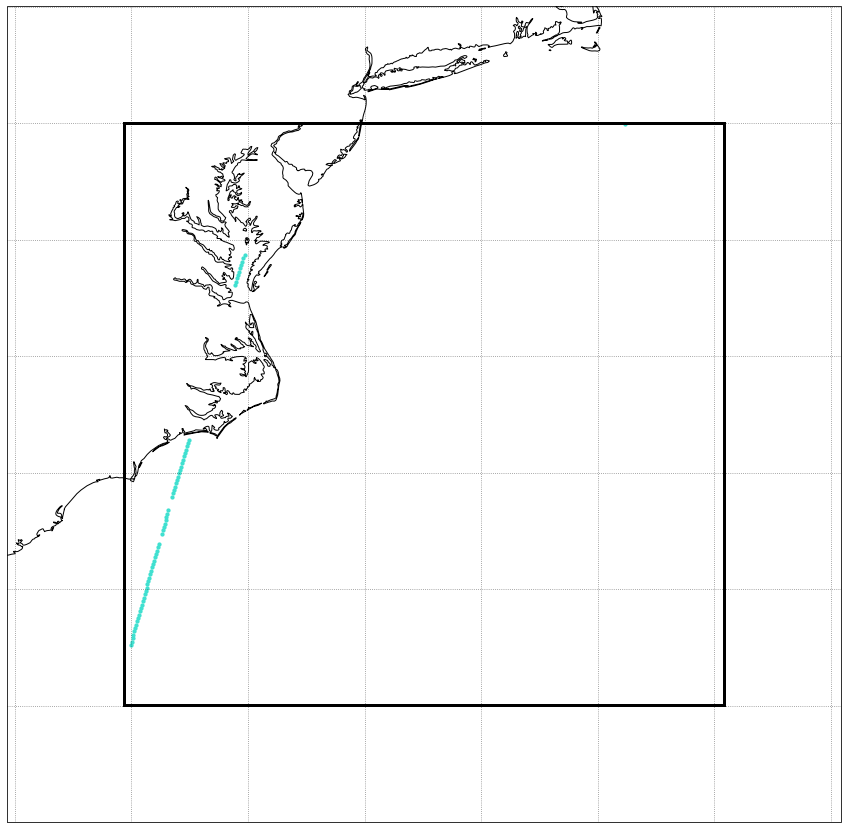

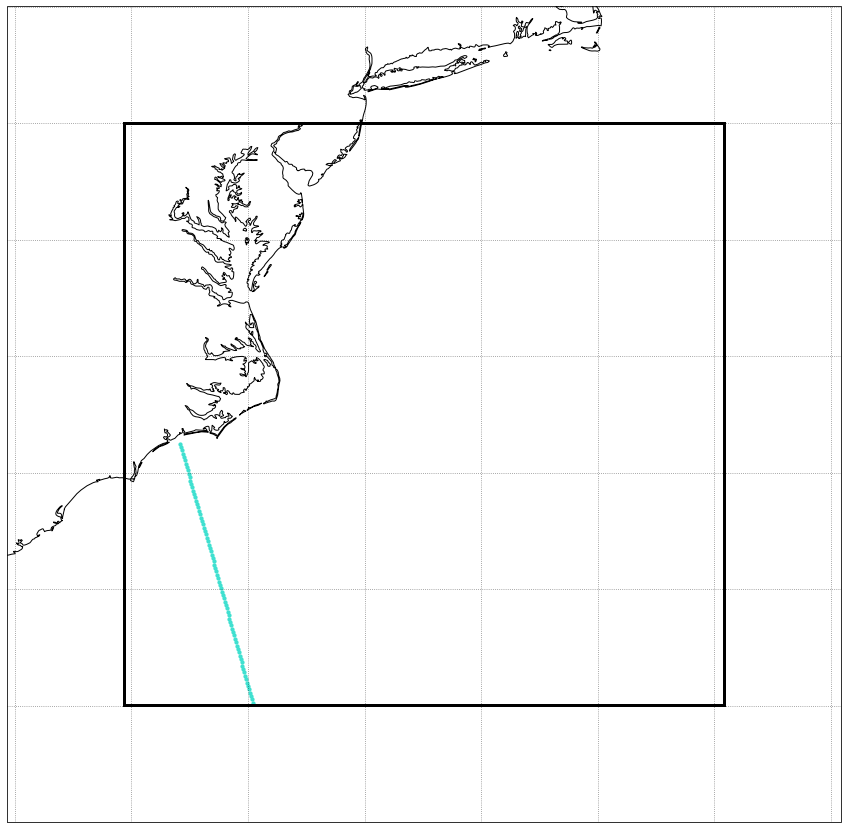

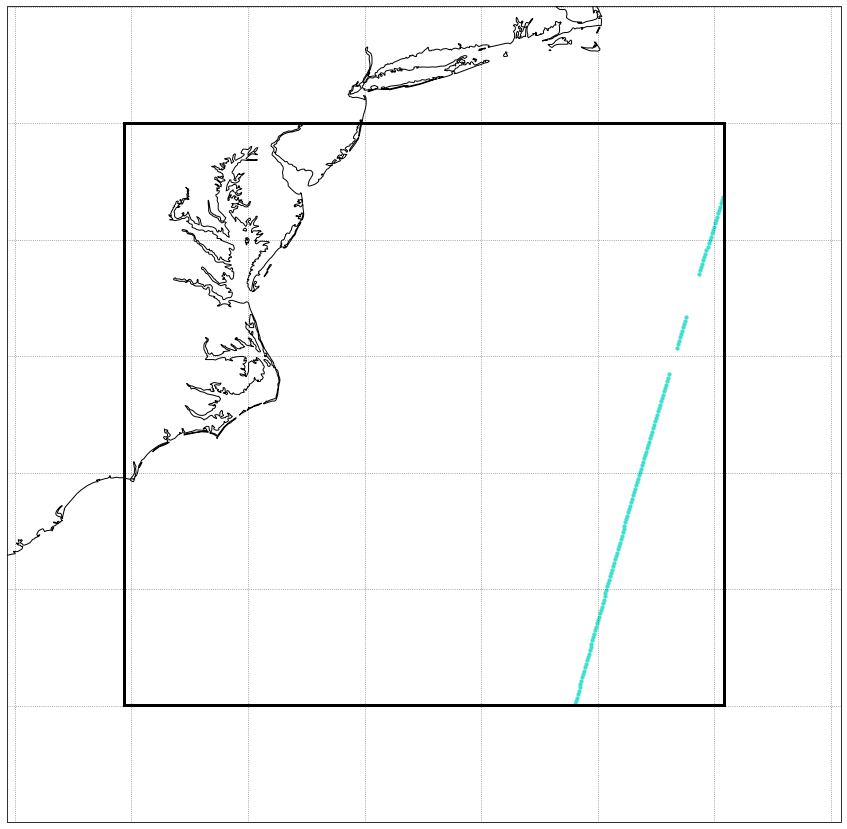

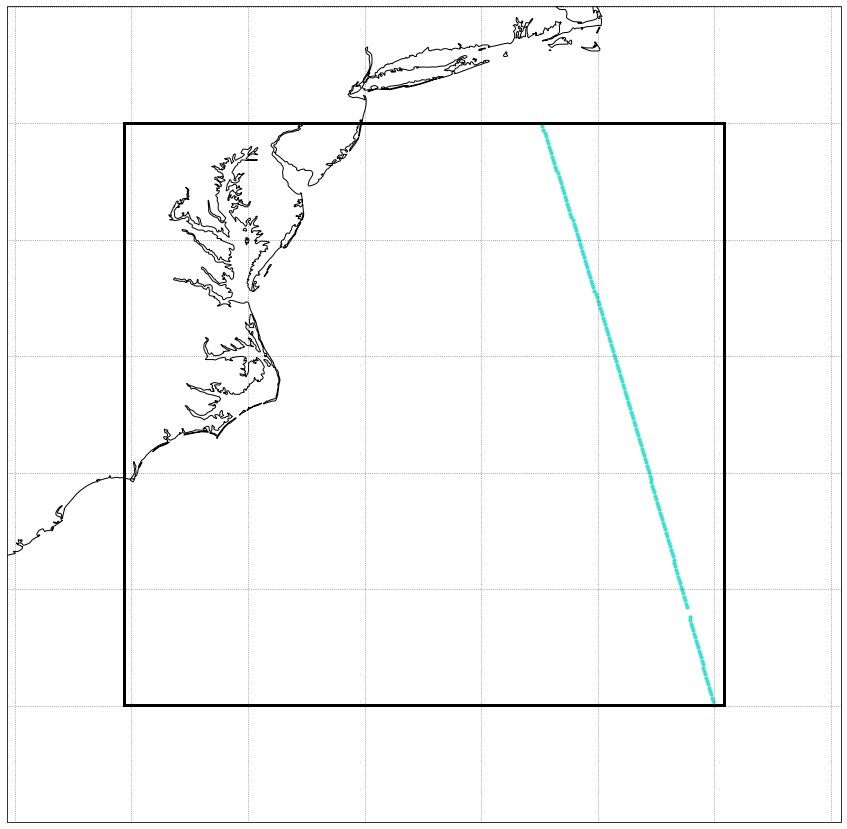

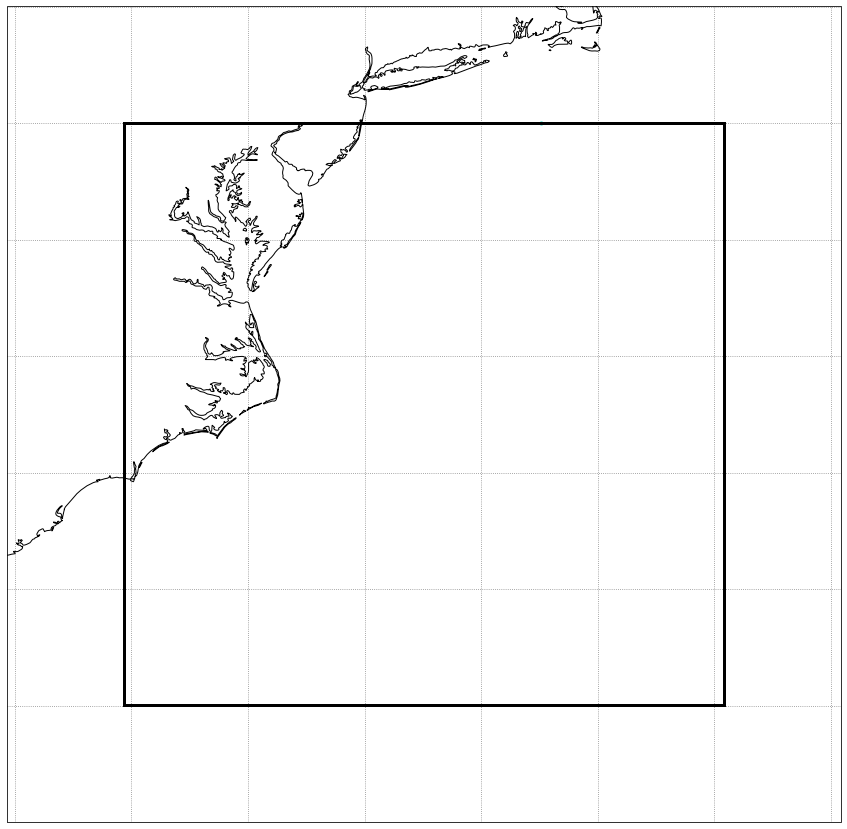

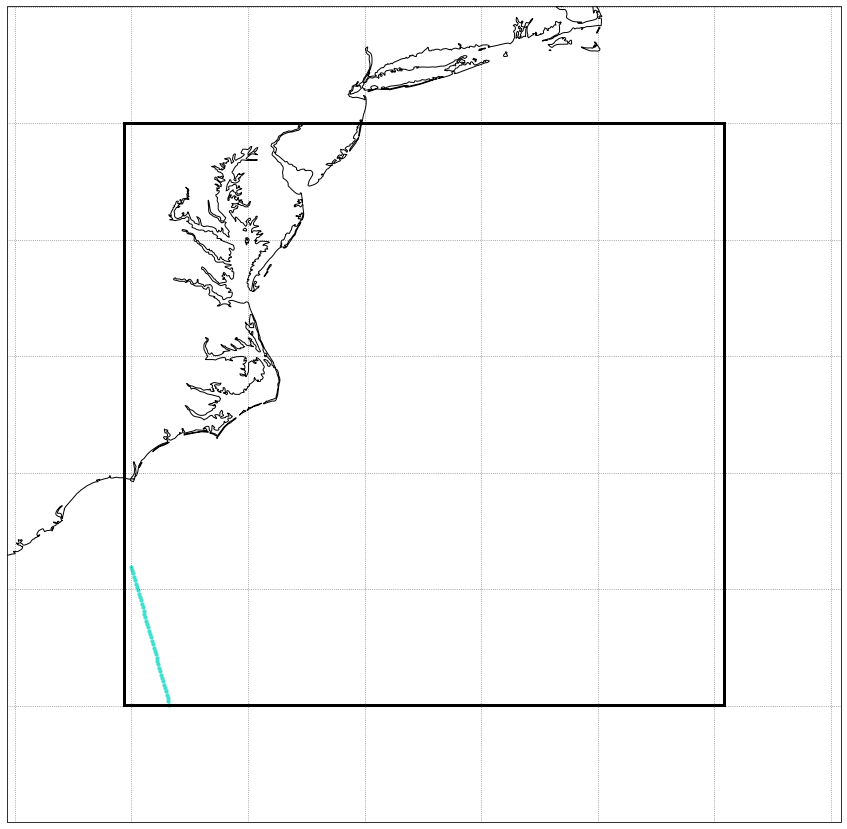

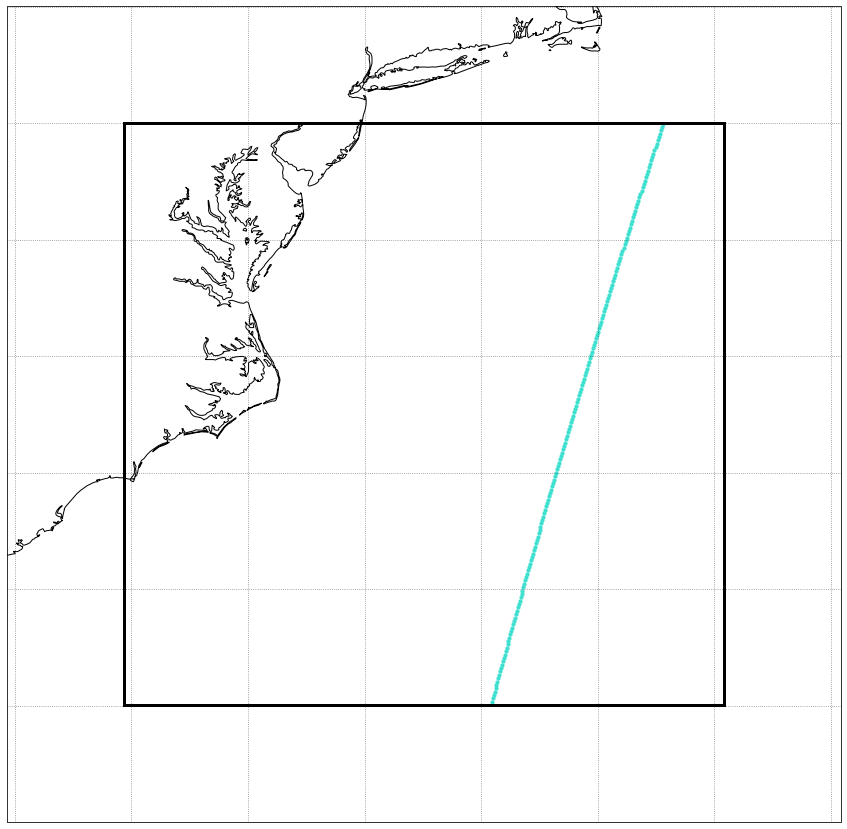

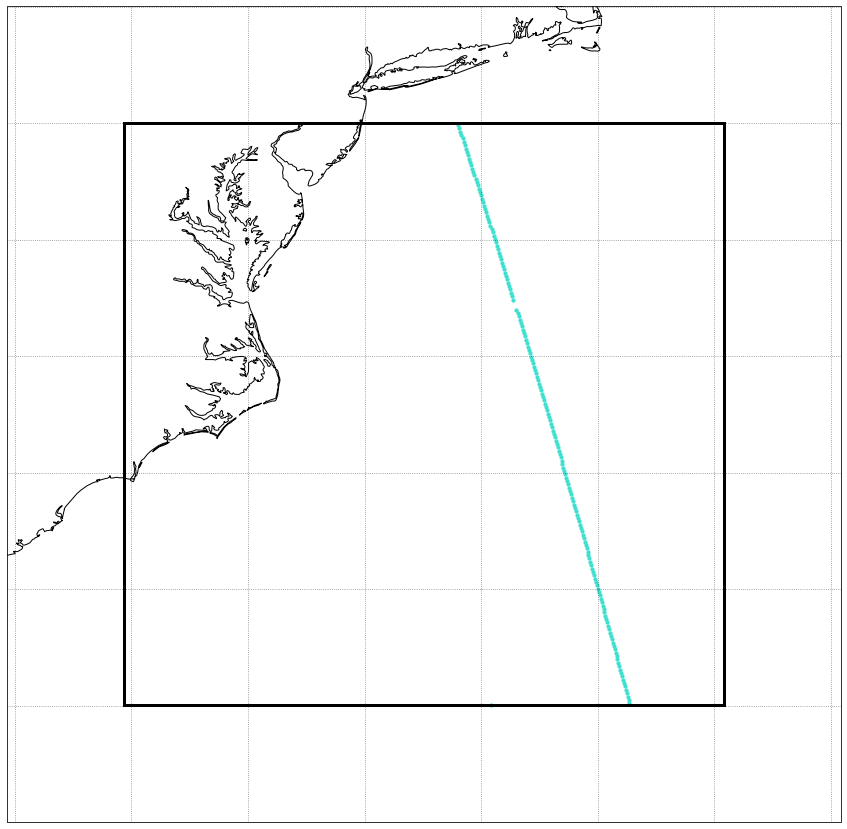

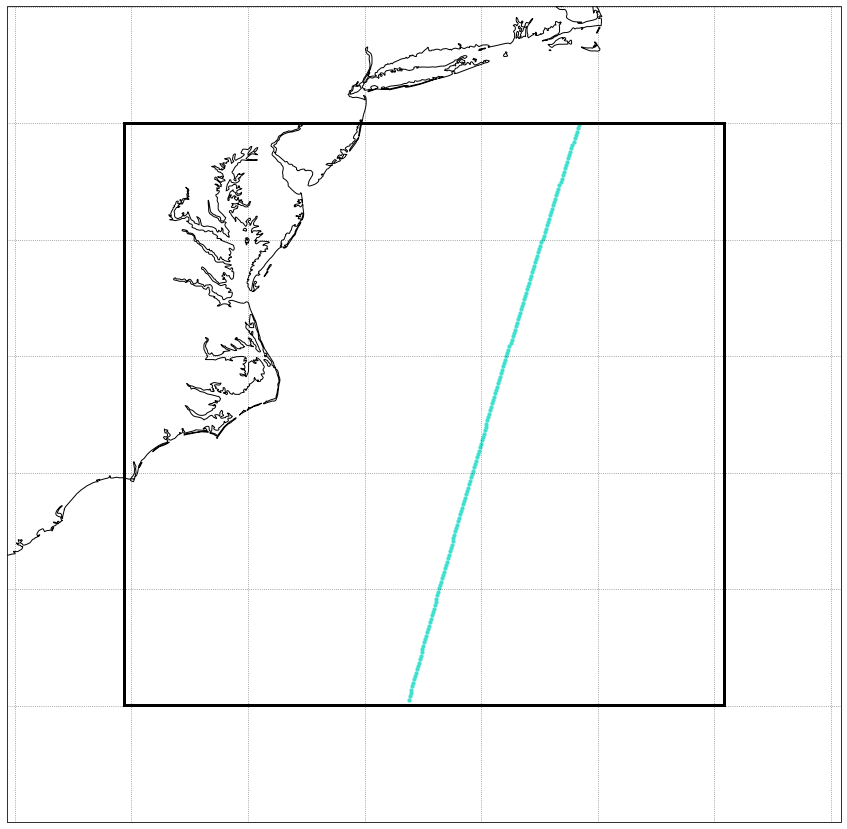

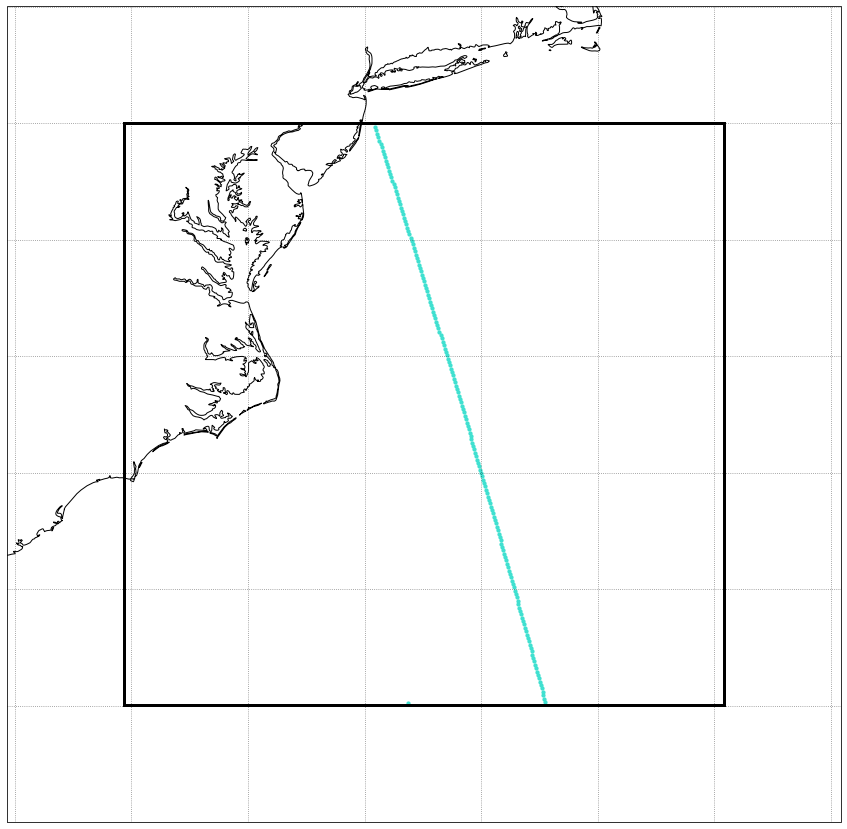

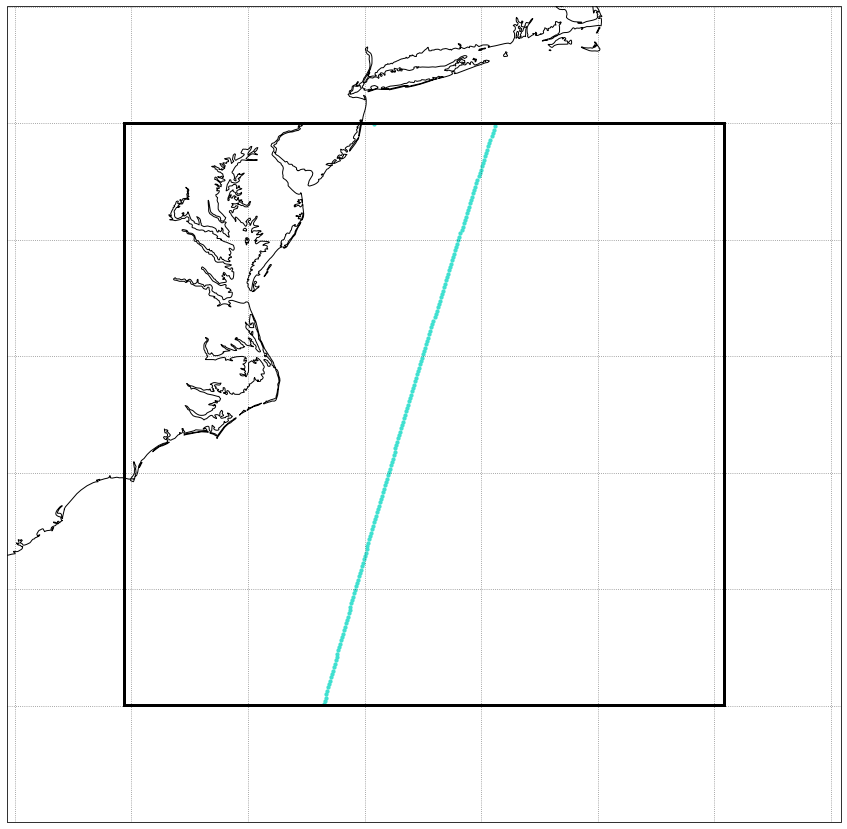

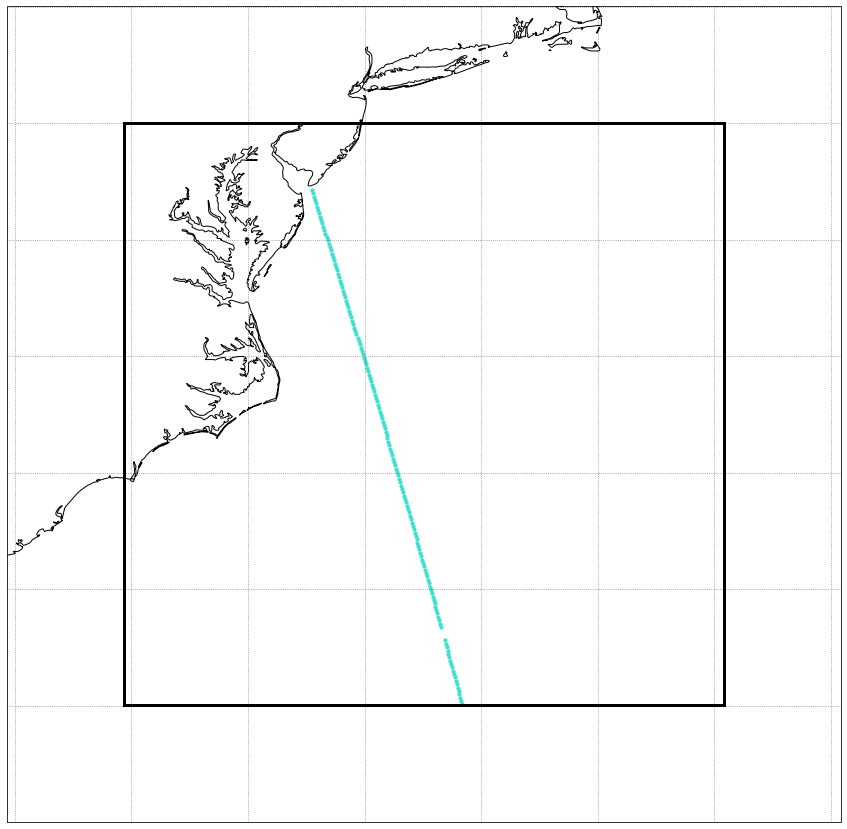

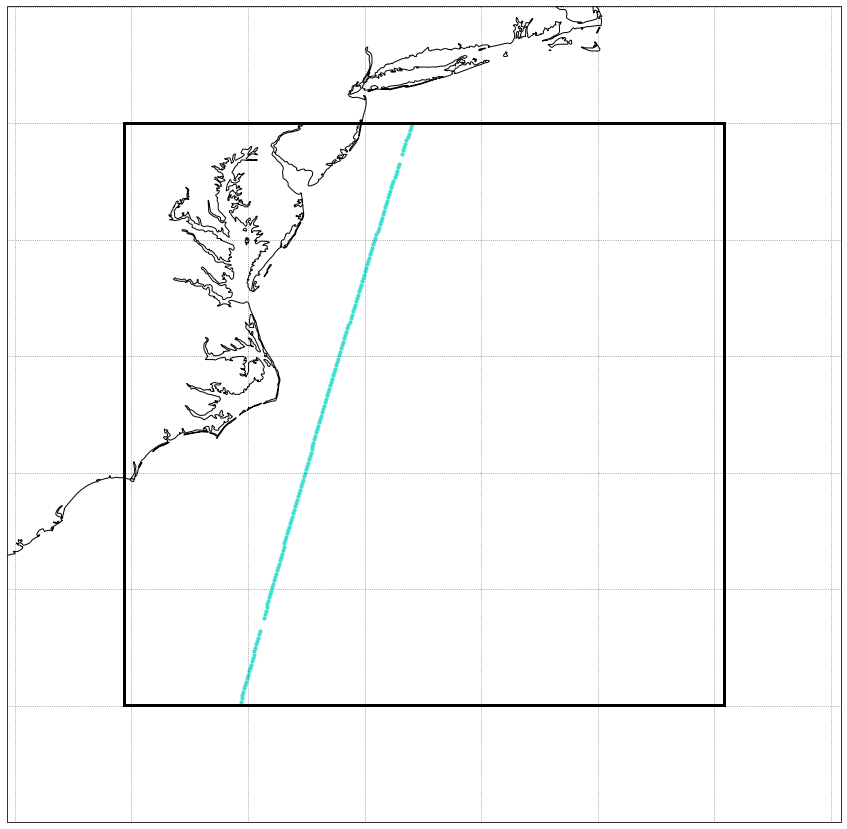

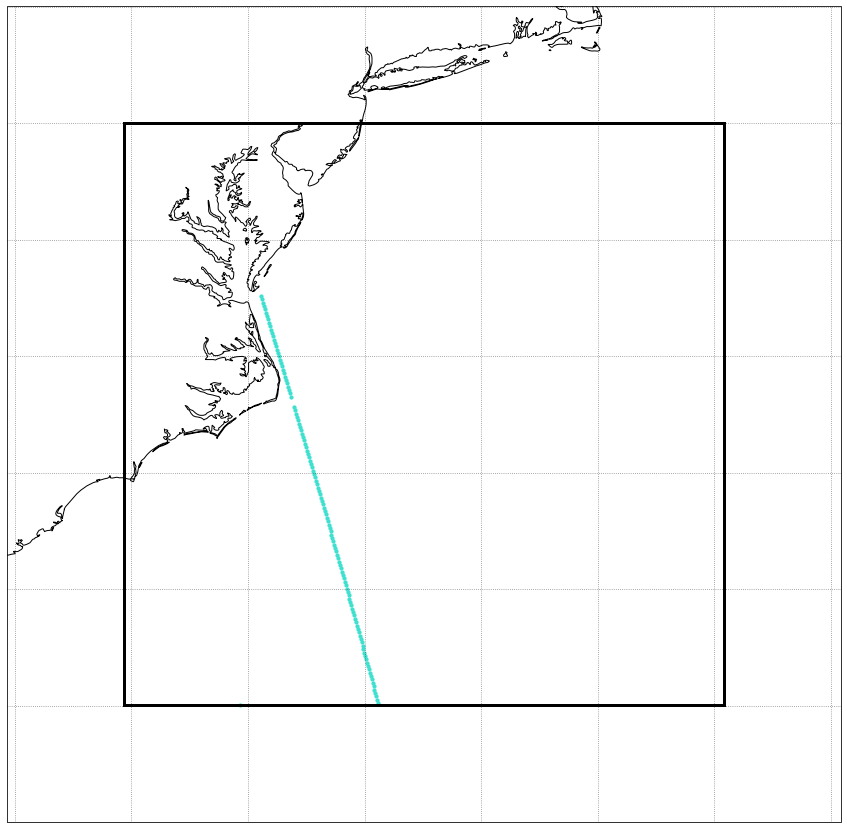

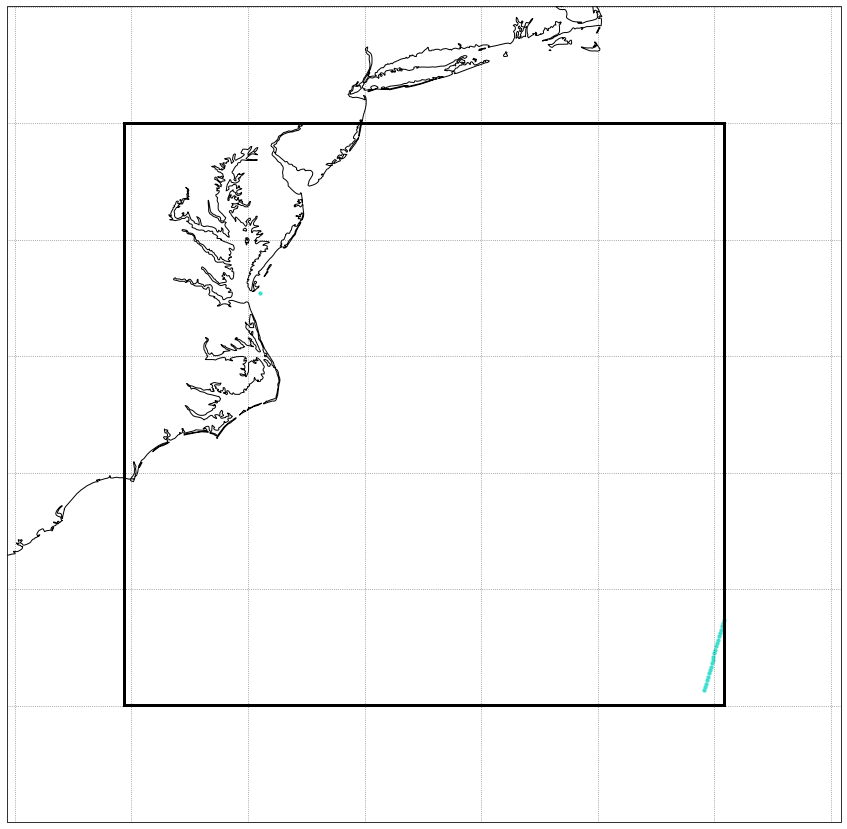

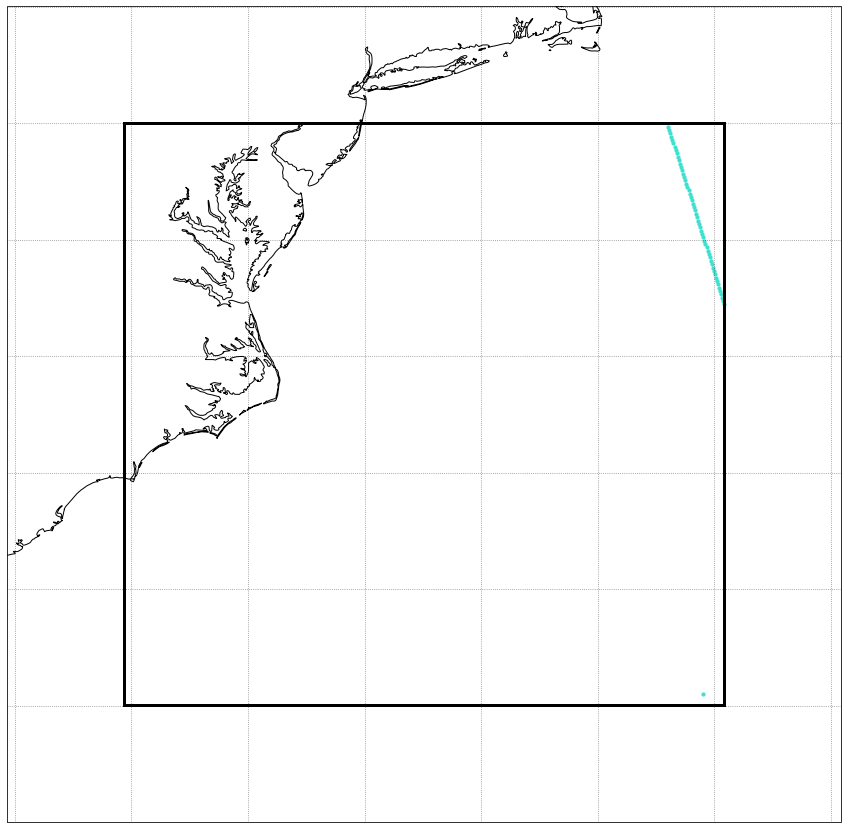

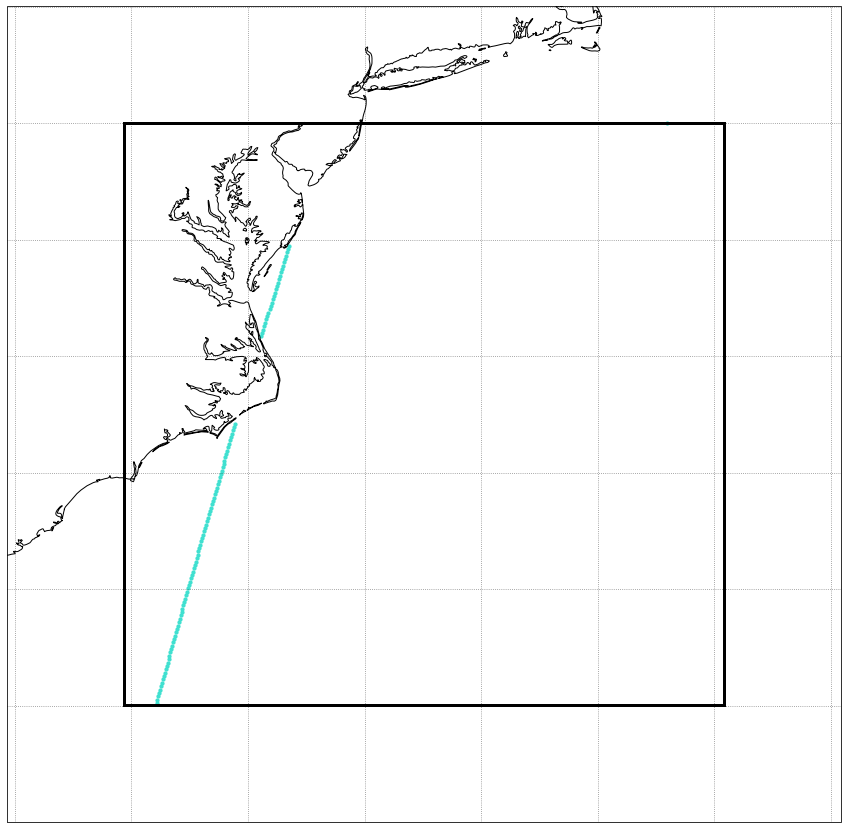

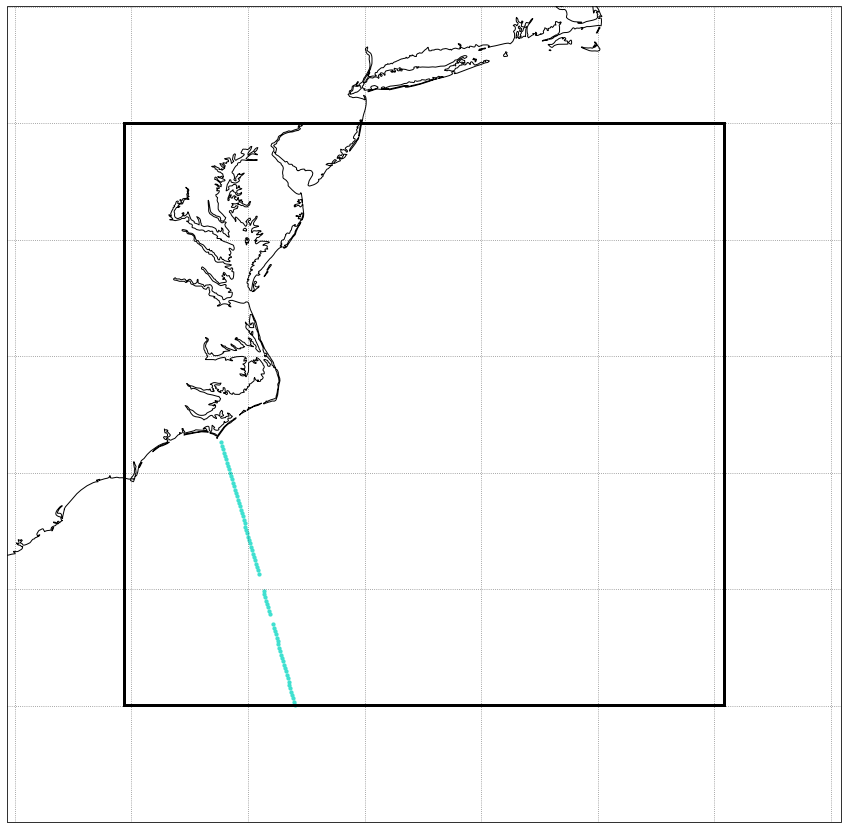

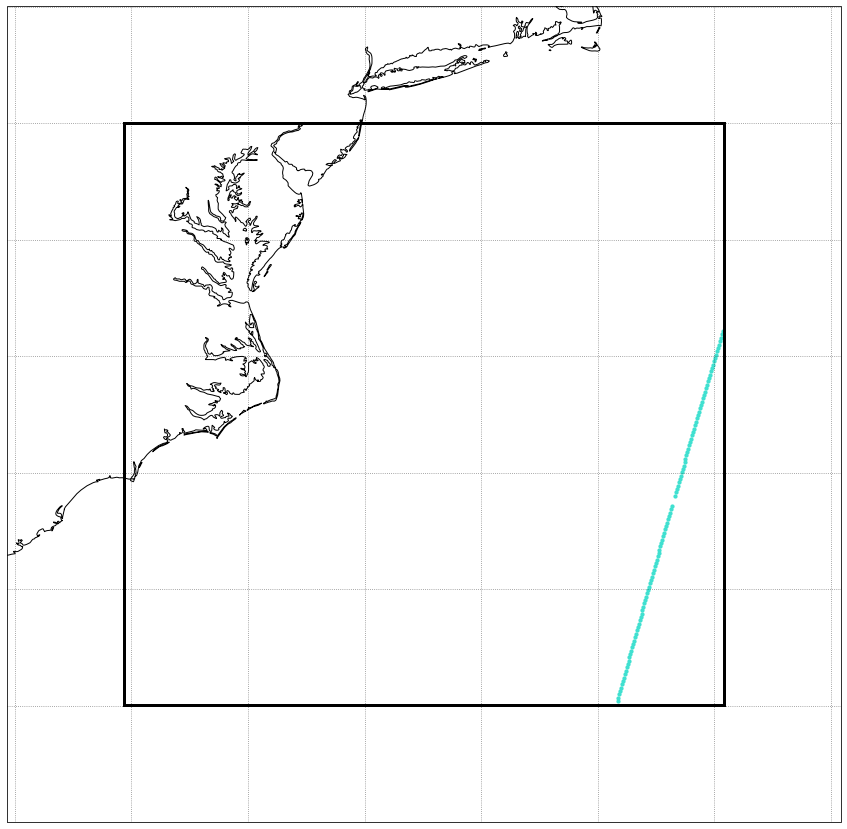

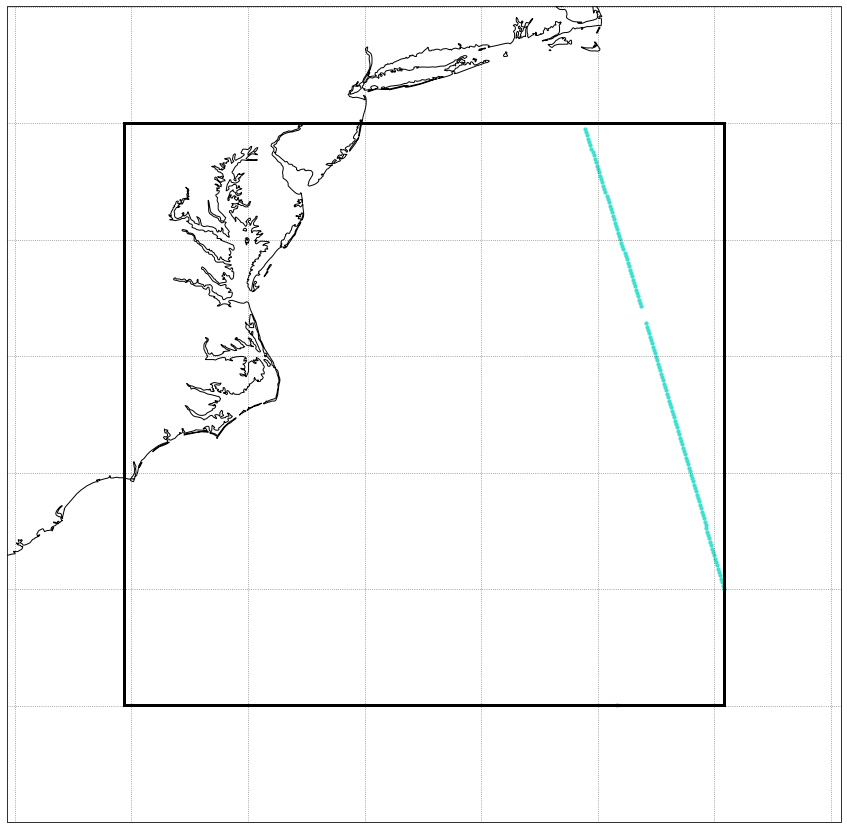

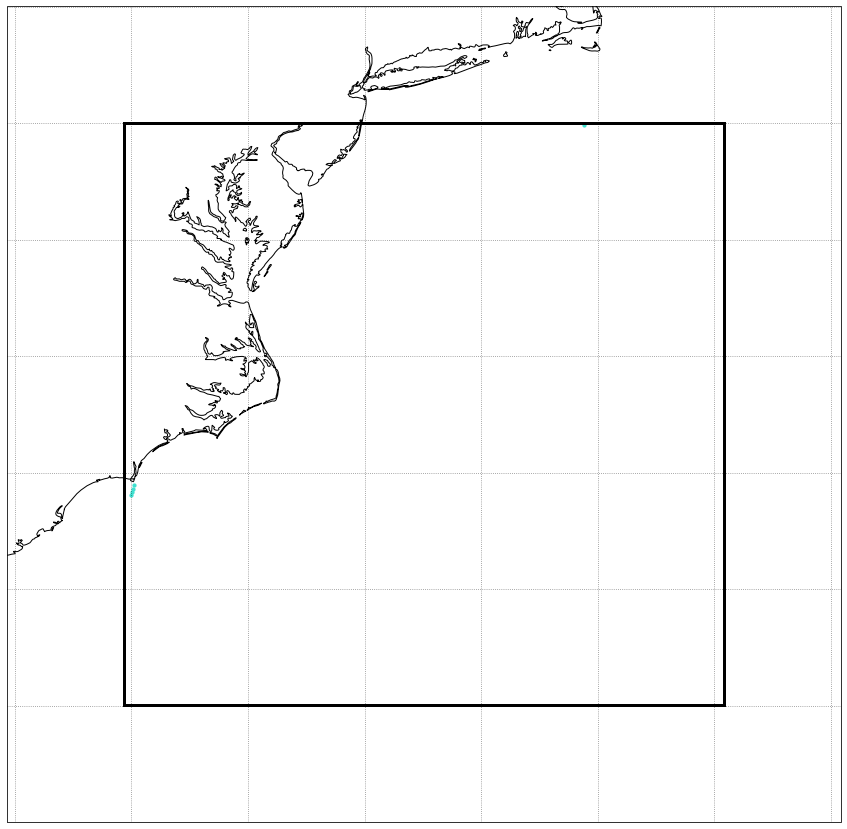

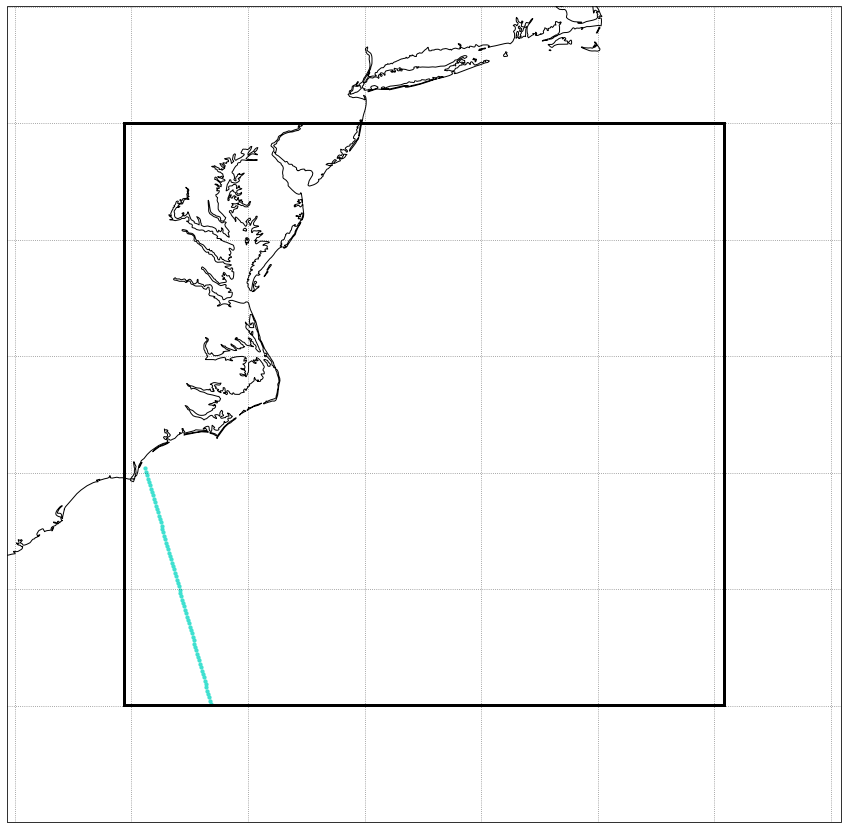

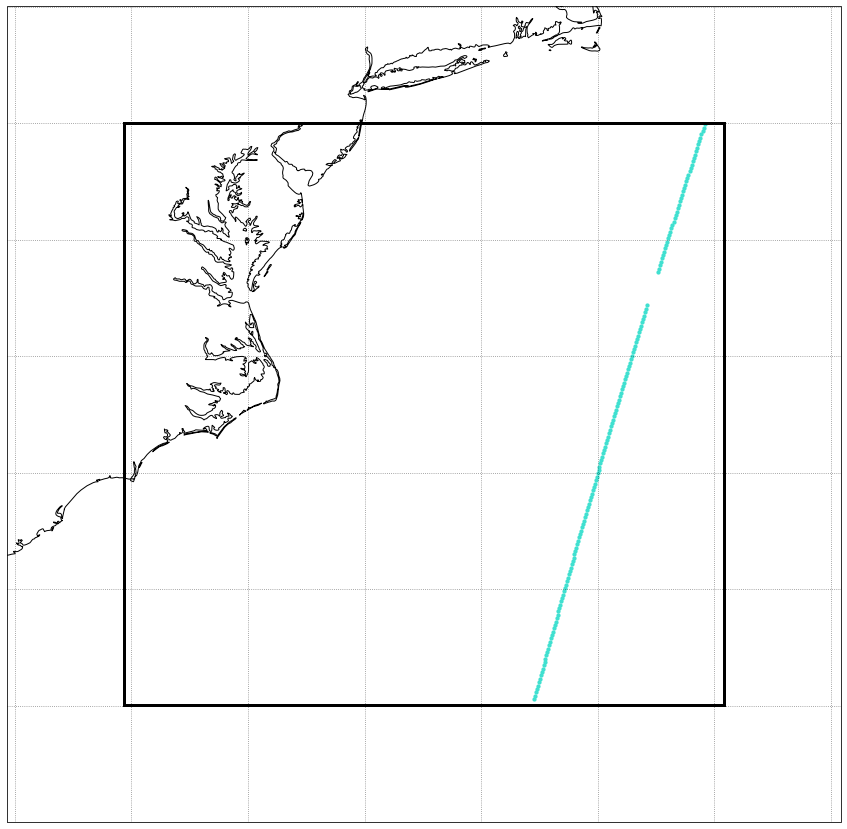

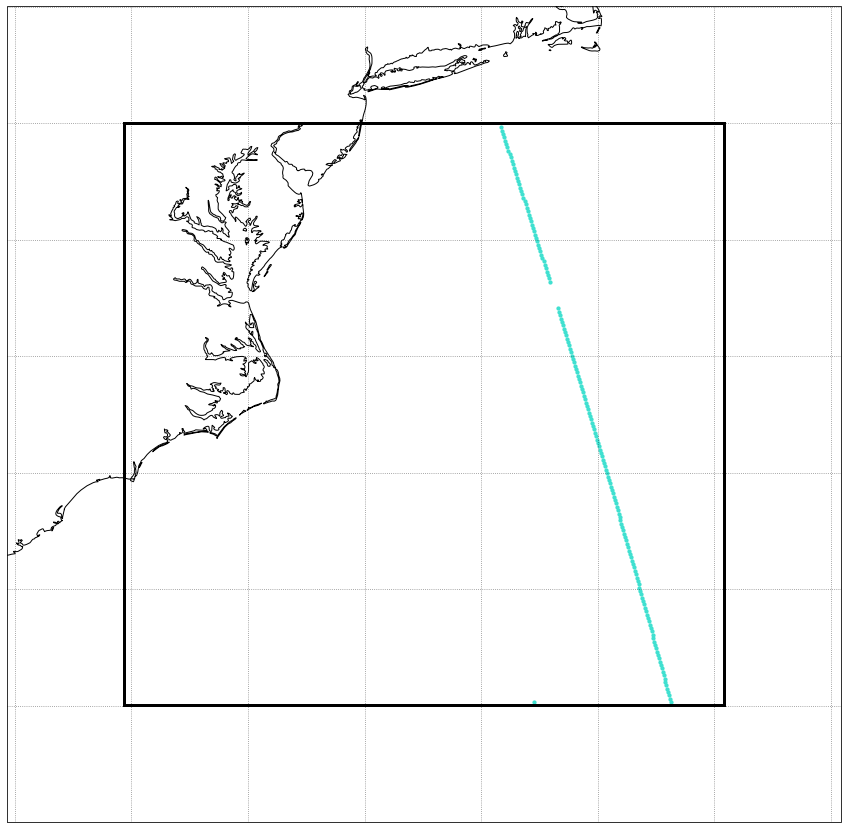

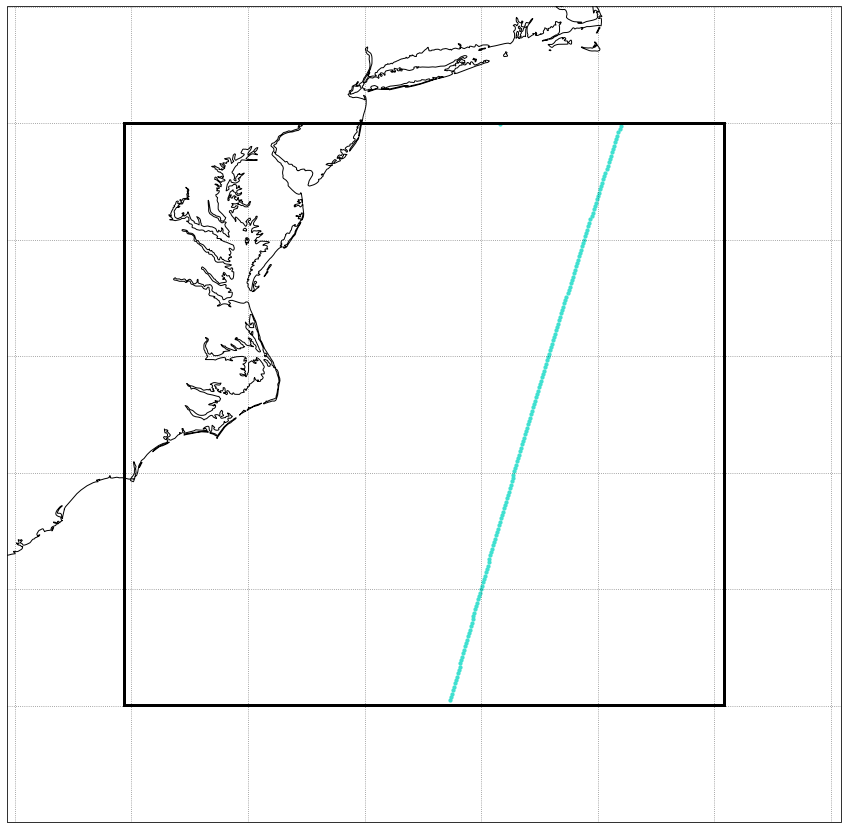

In [128]:
for k in np.arange(len(index_tracks)):
    
    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                              alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
    ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

    plt.scatter(ST.lon[index_tracks[k][0]:index_tracks[k][1]],ST.lat[index_tracks[k][0]:index_tracks[k][1]], c='turquoise',
                label='altika tracks', linewidth=0, s=18,
                transform=ccrs.PlateCarree(),zorder=1);
    plt.savefig('plots-tracks/altika_tracks_'+str(k)+'.png')